In [1]:
import networkx as nx
import matplotlib
%matplotlib inline
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import random
import time

In [ ]:
# ONLY IF COLAB 
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/src/NetworkSyncCapstone

In [2]:
import sys
sys.path.append('./Metropolis/')
sys.path.append('./src')

In [ ]:
# ANALYSINg RESULTS  FROM A WHOLE RUN
#-----------------------

#-------------------------------------------------------------------
# Analyse 'r_ER-100-p0.1-InDegree-NoSelf-RandomW'
#--------------------------------------------------------------------

from metropolisHastings import loadFromPickle

pickleroot = './data/r_ER-100-p0.1-InDegree-NoSelf-RandomW'

result = loadFromPickle(pickleroot=pickleroot, measurenames=['discreteSigma2Analytical','weighted_average_clustering'], gml=False, errorbar=True, title=None, figsize=None)

    # name like r_Gcatu_TSE_up_beta_3000.pkl
    #     E.G. PICKLEROOT='r_Gcatu_TSE_'

In [4]:
# LOADING A BETA
#-------------------
from pickleUtil import pickleLoad

result_beta = pickleLoad('r_FixIn-100-DegIn2-InDegree-NoSelf-FixedW_up_beta_500', './data')
result_beta

Loading object r_FixIn-100-DegIn2-InDegree-NoSelf-FixedW_up_beta_500 from pickle file ./data/r_FixIn-100-DegIn2-InDegree-NoSelf-FixedW_up_beta_500.pkl


{'samples': {'N': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
  'L': [200, 200, 200, 200, 200, 200, 200, 200, 200, 200],
  'average_degree': [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0],
  'sigma_z': [1.7944358444926358,
   1.6124515496597103,
   1.7832554500127007,
   1.8547236990991411,
   1.8493242008906934,
   1.8601075237738276,
   1.8814887722226776,
   1.9697715603592207,
   1.897366596101028,
   1.9697715603592207],
  'weighted_average_clustering': [0.03816666666666666,
   0.029904761904761896,
   0.03844841269841269,
   0.03659126984126985,
   0.0414920634920635,
   0.02991666666666666,
   0.03136111111111111,
   0.034888888888888886,
   0.024499999999999997,
   0.03383333333333333],
  'discreteSigma2Analytical': [2224.4185418181964,
   2502.09792993164,
   2502.119303662109,
   2502.2008484374996,
   2502.2168984375003,
   2502.289216406249,
   2502.3077898437496,
   2502.3028562499994,
   2502.3493742187493,
   2502.3719468749996],
  'average_clustering': [0.03

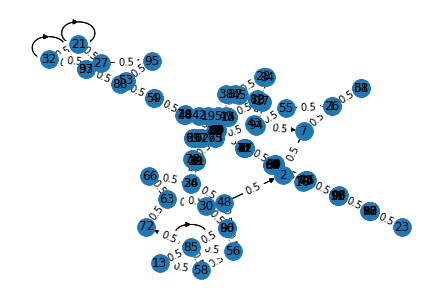

In [5]:
G = result_beta['lastnet']
layout = nx.kamada_kawai_layout(G)
nx.draw(G, layout)
nx.draw_networkx(G, pos=layout)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
plt.show()

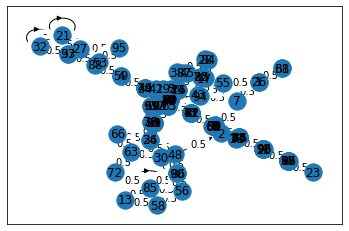

In [6]:
from gvisu import drawCurvedEdgesGraph

drawCurvedEdgesGraph(G)

In [7]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [1]:
import torch
torch.cuda.is_available()

False

In [ ]:
  #-------------------------------------------------------------------
# Analyse 'r_ER-100-p0.1-InDegree-NoSelf-RandomW'
#--------------------------------------------------------------------

from metropolisHastings import loadFromPickle

pickleroot = './data/FixIn-100-DegIn8-InDegree-NoSelf-FixedW-002'

result = loadFromPickle(pickleroot=pickleroot, measurenames=['discreteSigma2Analytical','weighted_average_clustering'], gml=False, errorbar=True, title=None, figsize=None)

    # name like r_Gcatu_TSE_up_beta_3000.pkl
    #     E.G. PICKLEROOT='r_Gcatu_TSE_'

In [116]:
import copy
import networkx as nx
import numpy as np
import random
import pandas as pd
import re
import pickle
from pathlib import Path
from pickleUtil import pickleLoad

# def loadSamplesFromPickle(experiment_name, datafolder='./data', constraint_name='discreteSigma2Analytical'):

#     # name like r_Gcatu_TSE_up_beta_3000.pkl
#     baseUri=Path(datafolder)

#     pklFiles=[x for x in baseUri.glob('**/' + experiment_name + '*.pkl')]

#     if pklFiles==[]:
#         print(f'No files found here {datafolder}/{experiment_name}*.pkl')
#         return

#     patternBeta = r"beta_(-?[0-9]*)\.pkl"
#     patternUp = r"_up_"
#     patternStartNet = r"StartNet\.pkl"
#     patternBurnin = r"_burnin_(-?[0-9]*)\.pkl"

#     data  ={ 'beta': [], 'up': [], 'g': [], 'time':[], 'file':[], 'experiment':[], 'comment':[], constraint_name: []}
#     #dataDown={ 'beta': [], 'up': [], 'g': [], 'time':[], 'file':[], 'experiment':[], 'comment':[]}

#     for i, fn in enumerate(pklFiles):
        
#         print('######################################################################################################')
#         print(f'Processing file {i}, {fn}')
#         print('######################################################################################################')
        
#         # Saving initial network 
#         if re.search(patternStartNet, fn.name)!= None:
#             startNet=True
#             result=pickleLoad(str(fn.stem), str(fn.parents[0]), silent=False)
#             data['beta'].append(-1)
#             data['up'].append(True)
#             data['g'].append(result)
#             data['time'].append(-1)
#             data['file'].append(fn)
#             data['experiment'].append(experiment_name)
#             data['comment'].append('startNet')
#             data[constraint_name].append(-1)
#             continue
        
#         comment=''
#         if re.search(patternBurnin, fn.name)!=None:
#         # Reading burning results
#             print('Reading burnin file')
#             beta = int(re.search(patternBurnin, fn.name).group(1))
#             up=True
#             comment='burnin'
#         else:
#         # Reading standard result
#             beta=int(re.search(patternBeta, fn.name).group(1))
#             up=False
#             if re.search(patternUp, fn.name)!= None:
#                 up=True
#             else:
#                 up=False

#         #loading pickle file
#         result=pickleLoad(str(fn.stem), str(fn.parents[0]), silent=True)

#         for i, (sample, constraint_measure) in enumerate(zip(result['samples']['g'], result['samples'][constraint_name])):

#             print(i, sample, constraint_measure)
#             data['beta'].append(beta)
#             data['up'].append(up)
#             data['g'].append(sample)
#             data[constraint_name].append(constraint_measure)
#             data['time'].append(i)
#             data['file'].append(fn)
#             data['experiment'].append(experiment_name)
#             data['comment'].append('')

#     df = pd.DataFrame.from_dict(data)
#     df = df.sort_values(by=['beta', 'time'])
            
#     return df

# Load experiments into df

In [29]:

from metropolisHastings import loadSamplesFromPickle
#df = loadSamplesFromPickle('r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW', datafolder='./data')
#df = loadSamplesFromPickle('FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003', datafolder='./data', constraint_name='continuousSigma2Analytical')
# FixIn-100-DegIn4-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MAX
# FixIn-100-DegIn3-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-Continuous-MAX
# FixIn-100-DegIn5-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-continuousSigma2AnalyticalHT-MAX-001
# FixIn-100-DegIn2-TSwapEdgesDirected-NoSelf-continuousSigma2AnalyticalHT-MAX-001
# FixIn-100-DegIn3-TSwapEdgesDirected-NoSelf-continuousSigma2AnalyticalHT-MAX-001
# FixIn-100-DegIn2-TSwapEdgesDirected-NoSelf-continuousSigma2AnalyticalHT-MIN-001
# ER-100-p0.05-InDegree-NoSelf-RandomW - no g
# FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MIN-002 no files found
# FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001
experiment_name = 'FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down'

df = loadSamplesFromPickle(experiment_name, datafolder='./data', constraint_name='continuousSigma2Analytical')

Processing file 0, data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100004.pkl
Processing file 1, data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100005.pkl
Processing file 2, data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100002.pkl
Processing file 3, data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100008.pkl
Processing file 4, data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100009.pkl
Processing file 5, data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100007.pkl
Processing file 6, data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100003.pkl
Processing file 7, data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100006.pkl
Processing file 8, data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100001.pkl


In [30]:
#last = 'FixIn-100-DegIn5-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-continuousSigma2AnalyticalHT-MAX-001_up_beta_100029'
last = 'FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100009'


## List of measures for one experiment

In [27]:
import numpy as np
import networkx as nx
from pickleUtil import pickleLoad
from scipy.sparse.linalg import eigsh 

# Largest eigenvalues of the Laplacian
def largestLaplacianEigenvalue(g):
    L = nx.directed_laplacian_matrix(g, nodelist=None,  weight='weight', walk_type=None, alpha=0.95)
    eigvals = eigsh(L, k=1, which='LM', sigma=1., return_eigenvectors=False)
    return eigvals[0]
largestLaplacianEigenvalue.__name__

def weightedDegreeAssortativity(g):
    return nx.degree_assortativity_coefficient(g, x='out', y='in', weight='weight', nodes=None)

def degreeAssortativity(g):
    return nx.degree_assortativity_coefficient(g, x='out', y='in', weight=None, nodes=None)

def averageWeightedNodeBetweennessCentrality(g):
    bs = nx.betweenness_centrality(g, normalized=True, weight='weight')
    N = g.number_of_nodes()
    average_b = np.sum(np.array([v for v in bs.values()]))/N
    return average_b

def percentageNullWeightedNodeBetweennessCentrality(g):
    bs = nx.betweenness_centrality(g, normalized=True, weight='weight')
    N = g.number_of_nodes()
    pct_b = np.sum(np.array([1 for v in bs.values() if v == 0]))/N
    return pct_b

# Diameter of the graph
# nx.diameter(g)

result_beta = pickleLoad(last, './data')
g=result_beta['lastnet']
print('Largest laplacian eigenvalue:', largestLaplacianEigenvalue(g))

#print(nx.diameter(g))
print('weighted degree assortativity:',  weightedDegreeAssortativity(g))
print('degree assortativity:', degreeAssortativity(g))
#print(nx.radius(g, e=None, usebounds=False))
print('average Weighted Node Betweenness Centrality:',averageWeightedNodeBetweennessCentrality(g))
print('percentage Null Weighted Node Betweenness Centrality:', percentageNullWeightedNodeBetweennessCentrality(g))

Loading object FixIn-100-DegIn2-TSwapEdgesDirected-NoSelf-continuousSigma2AnalyticalHT-MIN-001_down_beta_-100009 from pickle file ./data/FixIn-100-DegIn2-TSwapEdgesDirected-NoSelf-continuousSigma2AnalyticalHT-MIN-001_down_beta_-100009.pkl
Largest laplacian eigenvalue: 0.9922712470220842
weighted degree assortativity: nan
degree assortativity: nan
average Weighted Node Betweenness Centrality: 0.02381983096268811
percentage Null Weighted Node Betweenness Centrality: 0.14


## Generating measures from experiments

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


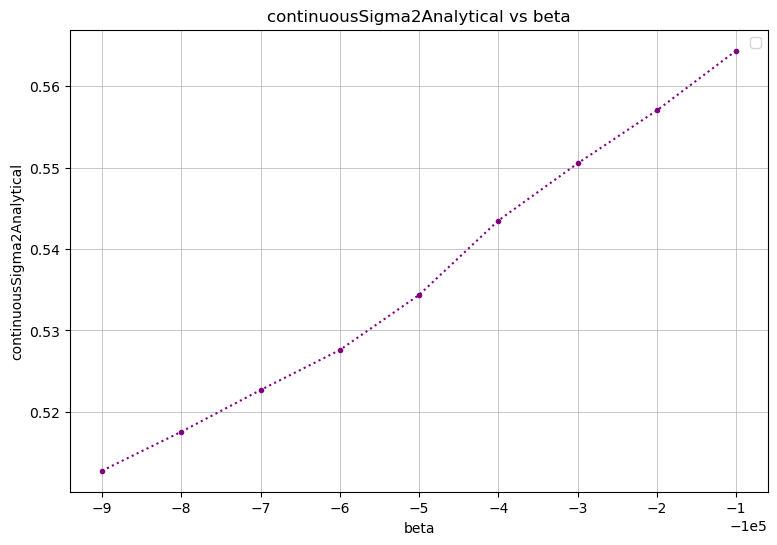

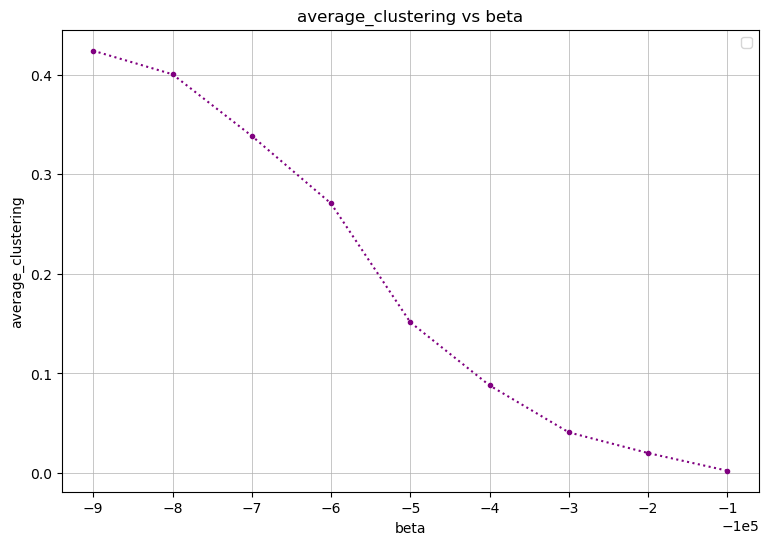

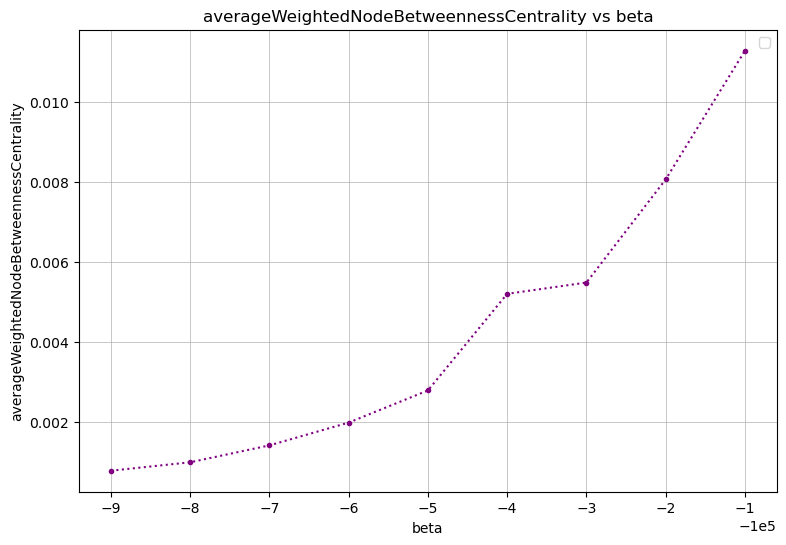

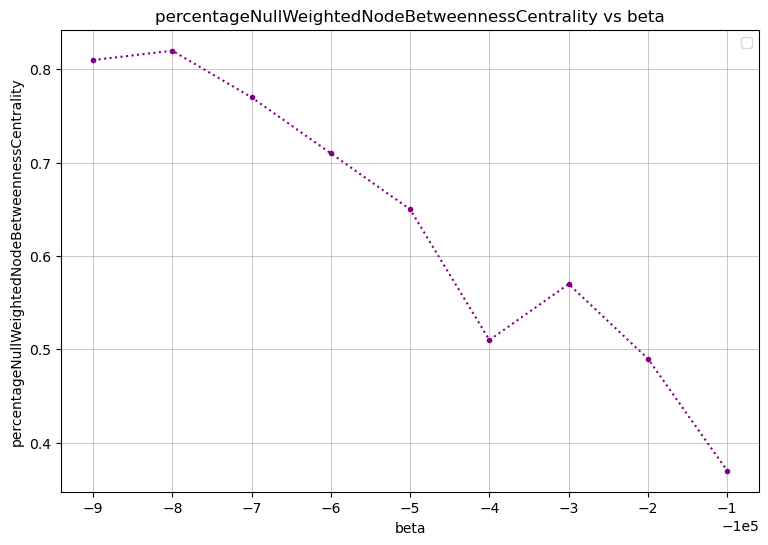

In [31]:
import networkx as nx
from metropolisHastings import analyzeMetropolisHastingsGraphs
from networkSigma import continuousSigma2Analytical

df, df_continuousSigma2Analytical = analyzeMetropolisHastingsGraphs(df, continuousSigma2Analytical)
df, df_clustering = analyzeMetropolisHastingsGraphs(df, nx.average_clustering)
#df, df_weightedDegreeAssortativity = analyzeMetropolisHastingsGraphs(df, weightedDegreeAssortativity)
#df, df_degreeAssortativity = analyzeMetropolisHastingsGraphs(df, degreeAssortativity)
df, df_averageWeightedNodeBetweennessCentrality = analyzeMetropolisHastingsGraphs(df, averageWeightedNodeBetweennessCentrality)
df, df_percentageNullWeightedNodeBetweennessCentrality = analyzeMetropolisHastingsGraphs(df, percentageNullWeightedNodeBetweennessCentrality)


In [33]:
df.head()

beta    up                                                  g  time  \
10  100010.0  True  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   0.0   
16  100010.0  True  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   0.0   
11  100010.0  True  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   1.0   
12  100010.0  True  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   2.0   
17  100011.0  True  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   0.0   

                                                 file  \
10  data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-C...   
16  data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-C...   
11  data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-C...   
12  data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-C...   
17  data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-C...   

                                           experiment comment  \
10  FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Contin...           
16  FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Contin...  burnin   
11  FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Contin...           
12  FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Contin...           
17  FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Contin...           

    continuousSigma2Analytical  \
10                  729.678106   
16                  729.656045   
11                  781.737982   
12                  781.748613   
17                  781.752255   

                                           clustering  average_clustering  \
10  {0: 0.5, 1: 0.3333333333333333, 2: 0.5, 3: 0.1...            0.571438   
16  {0: 0.3333333333333333, 1: 0.5, 2: 0.5, 3: 0.1...            0.488312   
11  {0: 0.5, 1: 0.3333333333333333, 2: 0.5, 3: 0.1...            0.601475   
12  {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.0744680851063829...            0.681682   
17  {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.0647773279352226...            0.688696   

    weightedDegreeAssortativity  degreeAssortativity  \
10                          NaN                  NaN   
16                          NaN                  inf   
11                         -inf                  inf   
12                          inf                  inf   
17                          inf                  inf   

    averageWeightedNodeBetweennessCentrality  \
10                                  0.000383   
16                                  0.000390   
11                                  0.000286   
12                                  0.000266   
17                                  0.000265   

    percentageNullWeightedNodeBetweennessCentrality  
10                                             0.64  
16                                             0.61  
11                                             0.66  
12                                             0.72  
17                                             0.72

<AxesSubplot:xlabel='beta'>

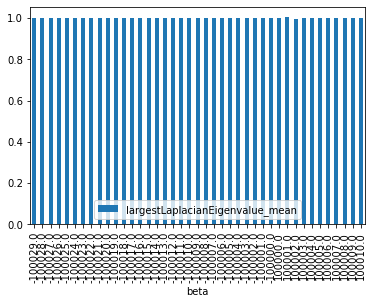

In [27]:
dfm.keys()

#dfm.plot(x='beta', y='average_clustering_mean', yerr=dfm['average_clustering_std'], kind='bar', capsize=4, rot=90)
dfm.plot(x='beta', y='largestLaplacianEigenvalue_mean', yerr=dfm['largestLaplacianEigenvalue_std'], kind='bar', capsize=4, rot=90)

<AxesSubplot:xlabel='beta'>

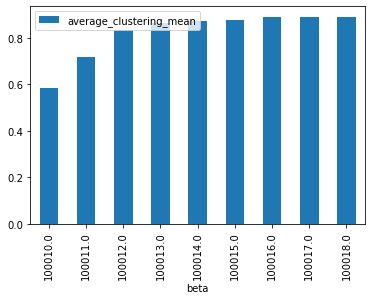

In [20]:
dfm.plot(x='beta', y='average_clustering_mean', yerr=dfm['average_clustering_std'], kind='bar', capsize=3, rot=90)

<AxesSubplot:xlabel='beta', ylabel='average_clustering'>

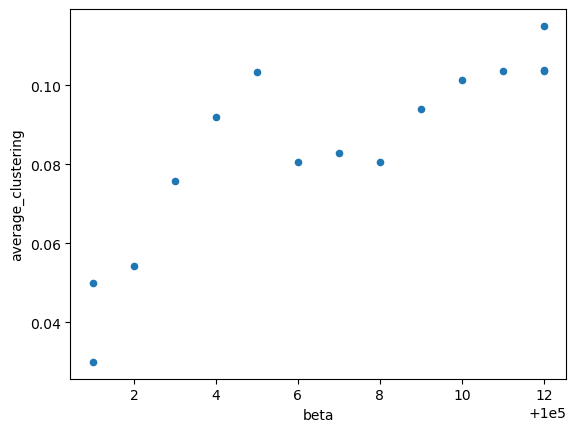

In [8]:
df.plot(x='beta', y='average_clustering', kind='scatter')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


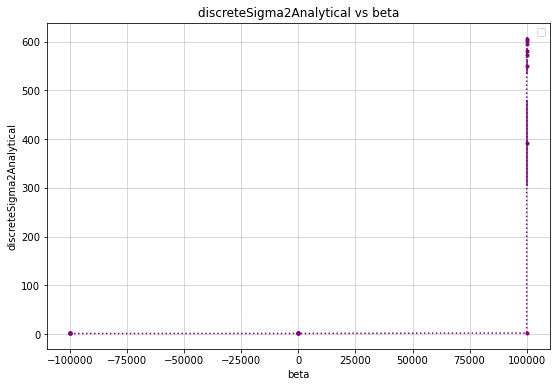

In [7]:
from networkSigma import discreteSigma2Analytical
df, dfm2 = analyzeMetropolisHastingsGraphs(df_up, discreteSigma2Analytical)

In [17]:
n1 = 10

print(f'{n1:#04}')

0010


In [9]:
# import matplotlib.pyplot as plt
# def drawMatrix(g, experiment_title=None, folder=None, showImages=True, **kwargs):
    
#     C=nx.to_numpy_array(g)
        
#     N=C.shape[0]
    
#     if showImages==True:    
#         plt.imshow(C, interpolation='nearest', cmap=plt.cm.gnuplot2,
#                     **kwargs)

#         plt.colorbar()
#         plt.suptitle(f'{experiment_title} - Graph weighted adjacency matrix', size=18)
#         plt.tight_layout()  
#         plt.show()
    
#     if (folder !=None):
#         plt.imsave(f'{folder}/{experiment_title}.jpg', C, cmap=plt.cm.gnuplot2,
#                 vmin=0)

# Draw graph from 1 experiment

Loading object FixIn-100-DegIn4-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MIN-001_down_beta_-100029 from pickle file ./data/FixIn-100-DegIn4-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MIN-001_down_beta_-100029.pkl


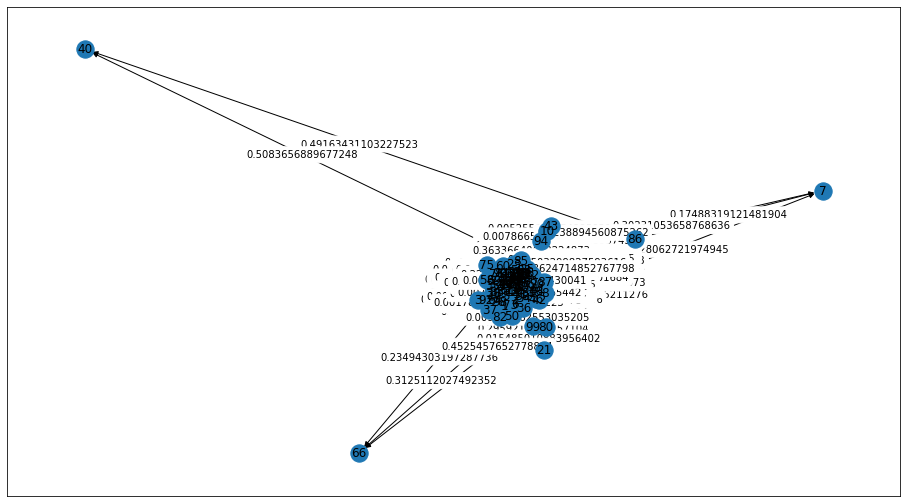

In [13]:
#-------------------------------------------------------------
# DRAW GRAPH FROM AN EXPERIMENT 
#---------------------------------------------------------------------
import sys
import networkx as nx
import matplotlib.pyplot as plt
sys.path.append('./Metropolis/')
sys.path.append('./src')
from gvisu import drawMatrix, drawCurvedEdgesGraph
from pickleUtil import pickleLoad

def drawGraph(g, experiment_title=None, folder=None, showImages=True, **kwargs):

    fig, ax = plt.subplots(figsize=(16,9))
    layout = nx.spectral_layout(g)
    drawCurvedEdgesGraph(g, ax)
    
result_beta = pickleLoad('FixIn-100-DegIn4-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MIN-001_down_beta_-100029', './data')
g=result_beta['lastnet']
    
drawGraph(g)

nx.write_graphml(g, './graphs/FixIn-100-DegIn4-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MIN-001_down_beta_-100029.graphml')
    
nx.write_edgelist(g, './graphs/FixIn-100-DegIn4-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MIN-001_down_beta_-100029.csv')

# Draw matrix from one experiment

Loading object FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003-StartNet@100009 from pickle file ./data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003-StartNet@100009.pkl
Loading object FixIn-100-DegIn5-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-continuousSigma2AnalyticalHT-MAX-001_up_beta_100029 from pickle file ./data/FixIn-100-DegIn5-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-continuousSigma2AnalyticalHT-MAX-001_up_beta_100029.pkl


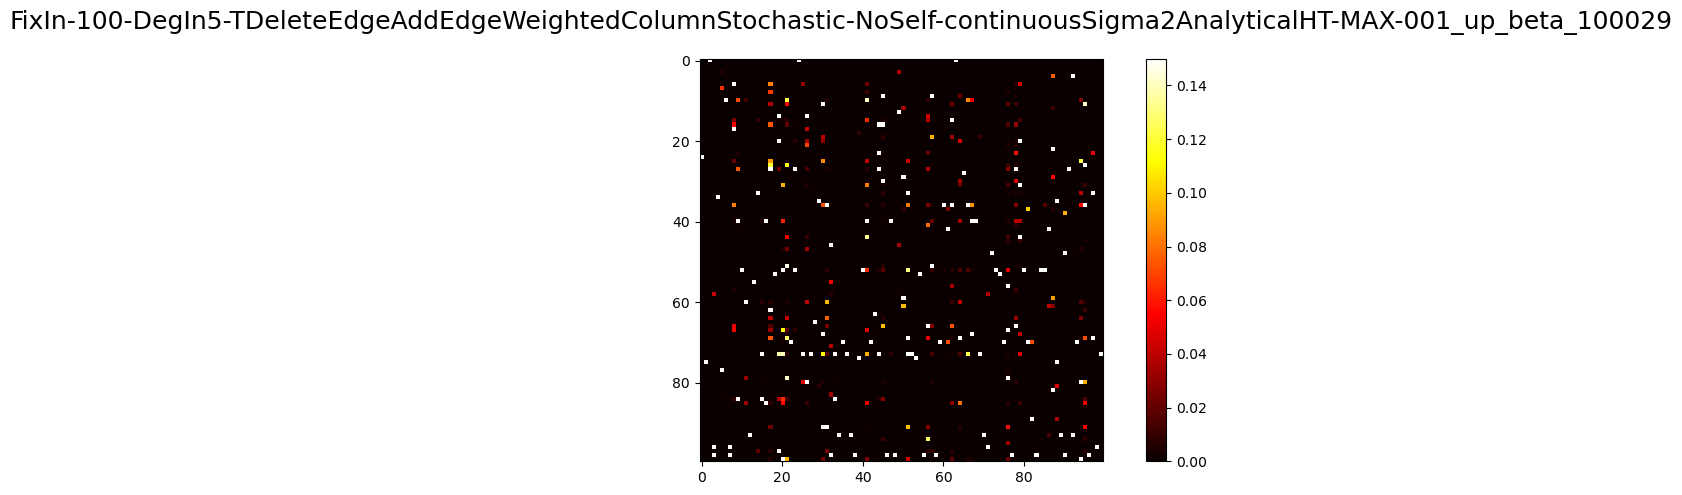

In [22]:
#---------------------------------------------------------------
# DRAW NET FROM AN EXPERIMENT
#----------------------------------------------------------------
import sys
import networkx as nx
sys.path.append('./Metropolis/')
sys.path.append('./src')
from gvisu import drawMatrix
from pickleUtil import pickleLoad
import matplotlib.pyplot as plt

# FixIn-100-DegIn4-TDeleteEdgeAddEdge-NoSelf-FixedW-Continuous-MIN-001_up_beta_-100000
# FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003_up_beta_100010
# FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003_up_beta_100018
# High with self loops - FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003_up_beta_100012
# disconnected graph ?  FixIn-100-DegIn4-InDegree-NoSelf-FixedW-Continuous-MIN-001_down_beta_-100029
# FixIn-100-DegIn4-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MIN-001_down_beta_-100029
# FixIn-100-DegIn2-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MIN-001_down_beta_-100004
# FixIn-100-DegIn3-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MIN-001_down_beta_-100029
# FixIn-100-DegIn5-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MIN-001_down_beta_-100029
# FixIn-100-DegIn5-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MIN-002_up_beta_-100030
# FixIn-100-DegIn3-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-Continuous-MAX-001_up_beta_100019
# FixIn-100-DegIn5-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-continuousSigma2AnalyticalHT-MAX-001_up_beta_100029

experiment = last

g = pickleLoad('FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003-StartNet@100009', './data')
result_beta = pickleLoad(experiment, './data')
g2=result_beta['lastnet']
#kwargs = { 'vmin': 0, 'vmax': 0.15, 'cmap': plt.cm.gnuplot2 }
kwargs = { 'vmin': 0, 'vmax': 0.15, 'cmap': plt.cm.hot }
drawMatrix(g2, experiment_title=f'{experiment}', folder='./images', showImages=True, **kwargs)
#drawGraph(g2, experiment_title=f'FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-MAX-003_up_beta_100010', folder='./images', showImages=True, **kwargs)

# USING DF - Print matrix or degree distribution at all stage of experiment

In [10]:
df.keys()

Index(['beta', 'up', 'g', 'time', 'file', 'experiment', 'comment',
       'continuousSigma2Analytical', 'average_clustering',
       'averageWeightedNodeBetweennessCentrality',
       'percentageNullWeightedNodeBetweennessCentrality'],
      dtype='object')

Row FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down -100009 0 - type g <class 'networkx.classes.digraph.DiGraph'>


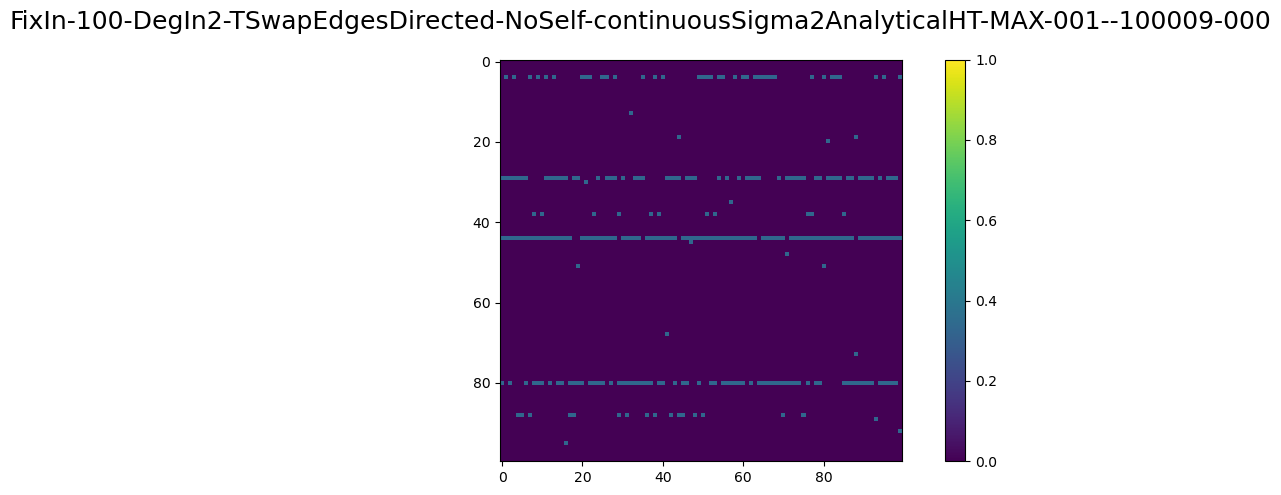

*****************************************
 data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100009.pkl


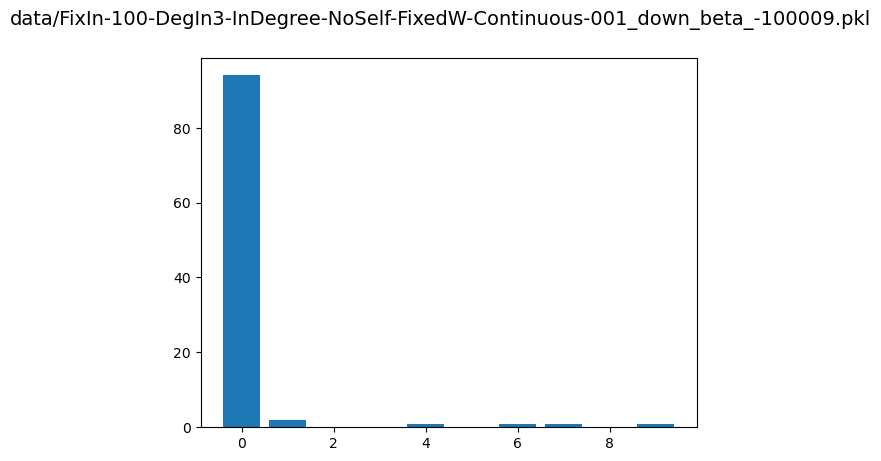

Row FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down -100008 0 - type g <class 'networkx.classes.digraph.DiGraph'>


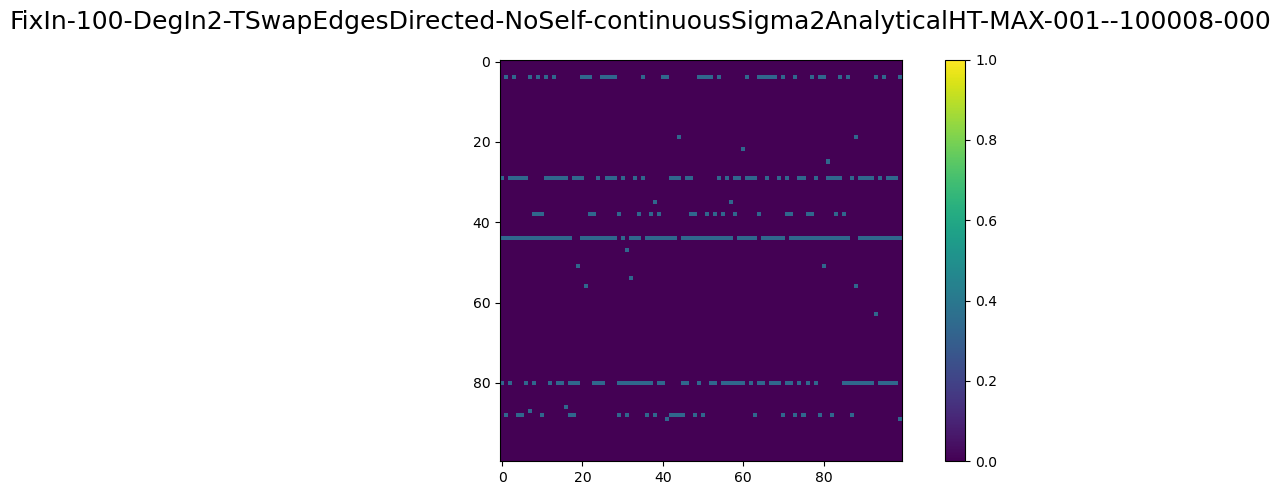

*****************************************
 data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100008.pkl


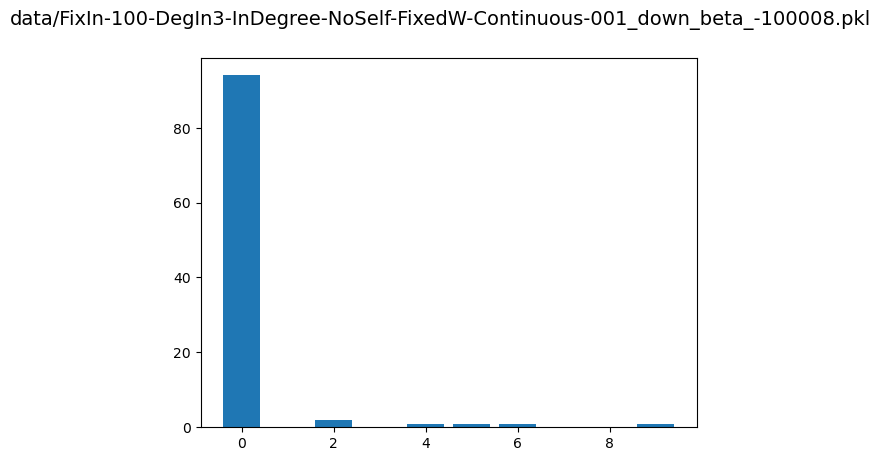

Row FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down -100007 0 - type g <class 'networkx.classes.digraph.DiGraph'>


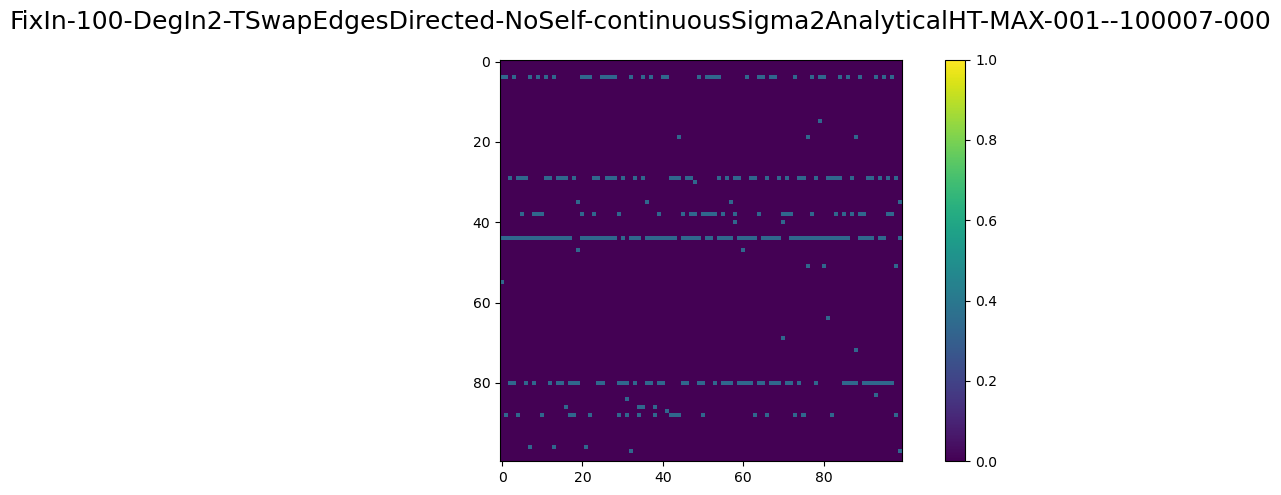

*****************************************
 data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100007.pkl


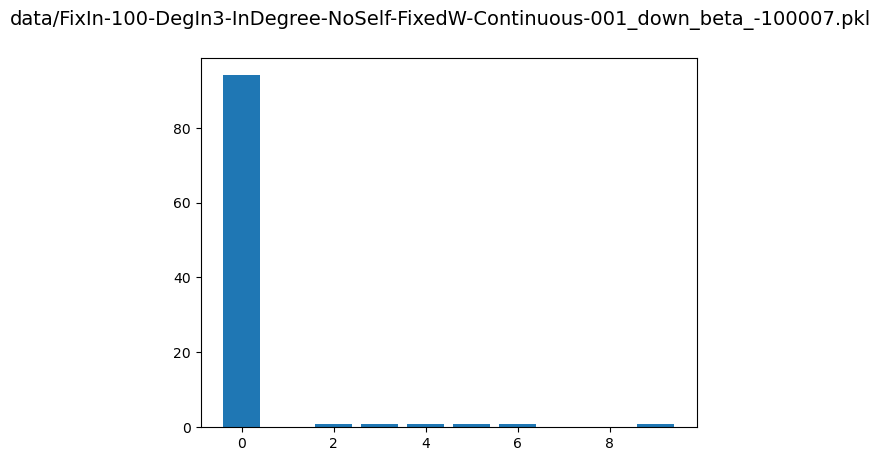

Row FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down -100006 0 - type g <class 'networkx.classes.digraph.DiGraph'>


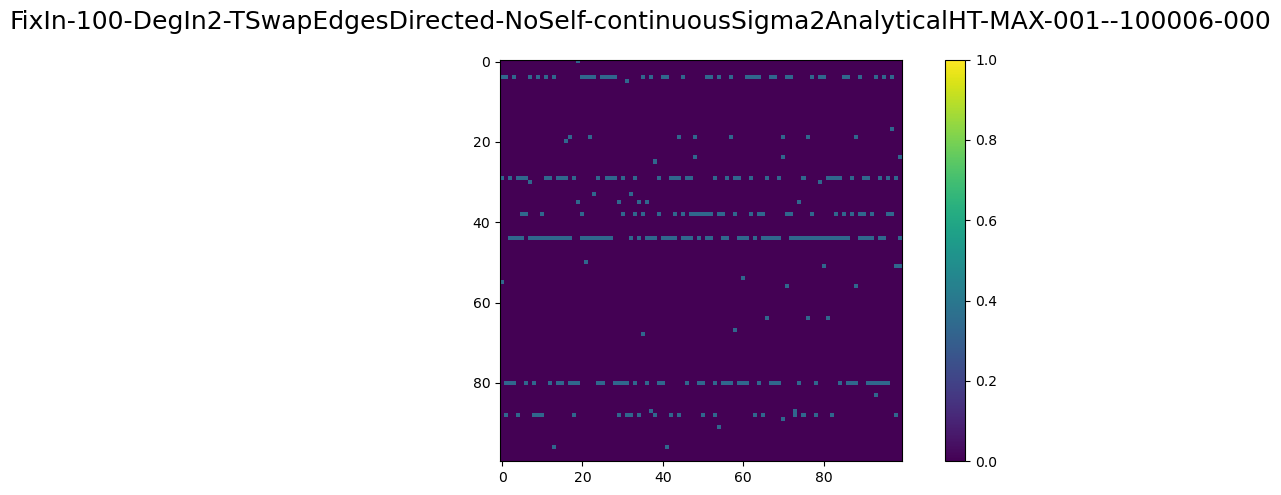

*****************************************
 data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100006.pkl


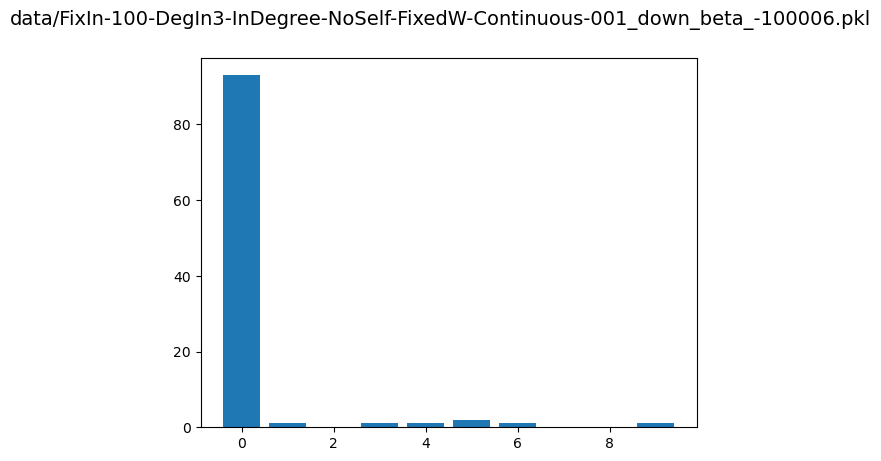

Row FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down -100005 0 - type g <class 'networkx.classes.digraph.DiGraph'>


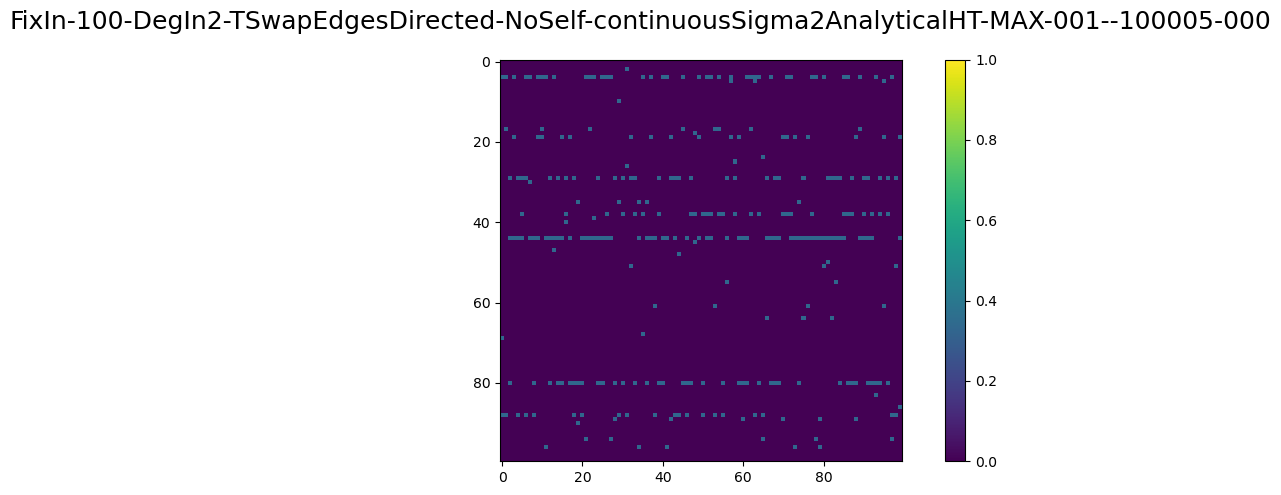

*****************************************
 data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100005.pkl


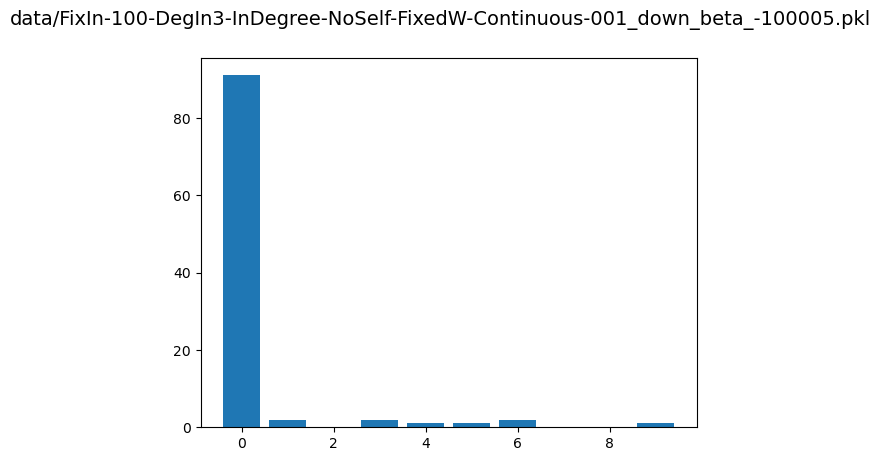

Row FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down -100004 0 - type g <class 'networkx.classes.digraph.DiGraph'>


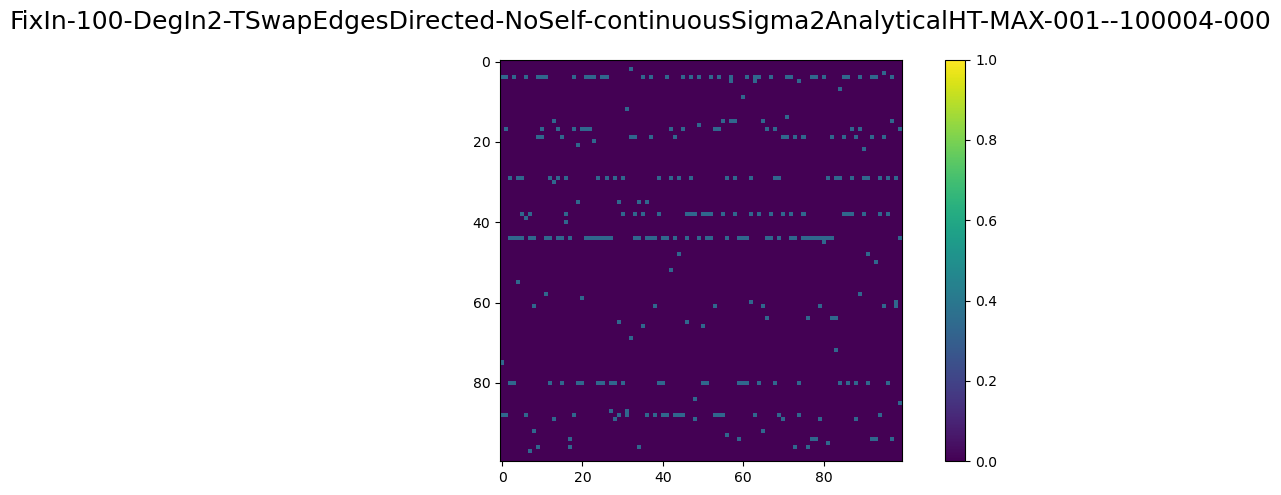

*****************************************
 data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100004.pkl


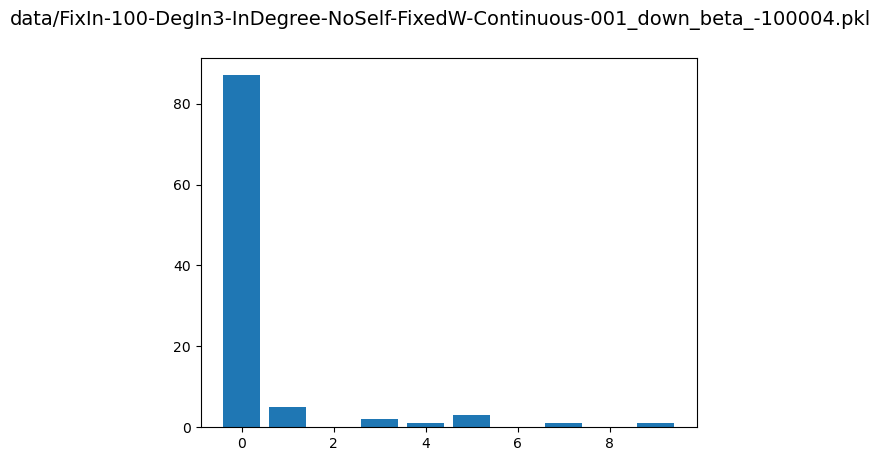

Row FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down -100003 0 - type g <class 'networkx.classes.digraph.DiGraph'>


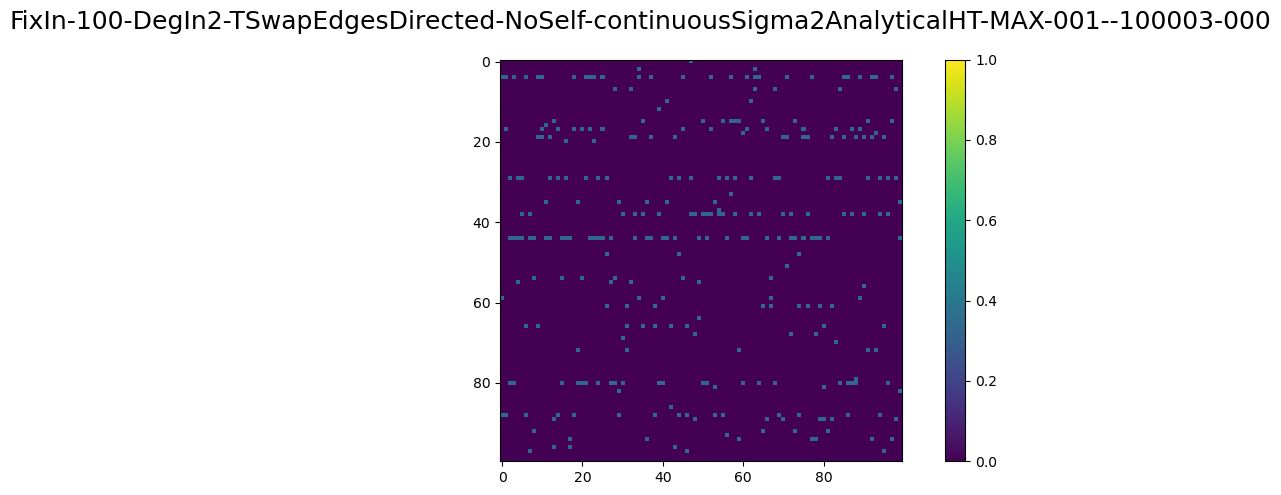

*****************************************
 data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100003.pkl


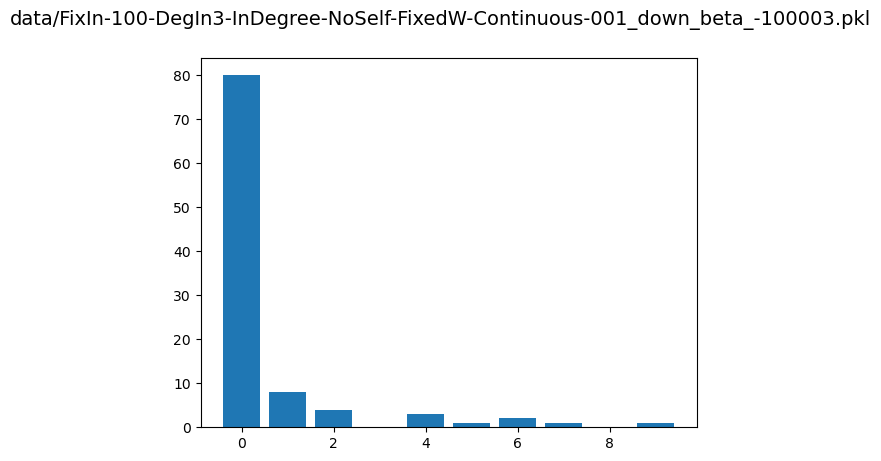

Row FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down -100002 0 - type g <class 'networkx.classes.digraph.DiGraph'>


*****************************************
 data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100002.pkl


Row FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down -100001 0 - type g <class 'networkx.classes.digraph.DiGraph'>


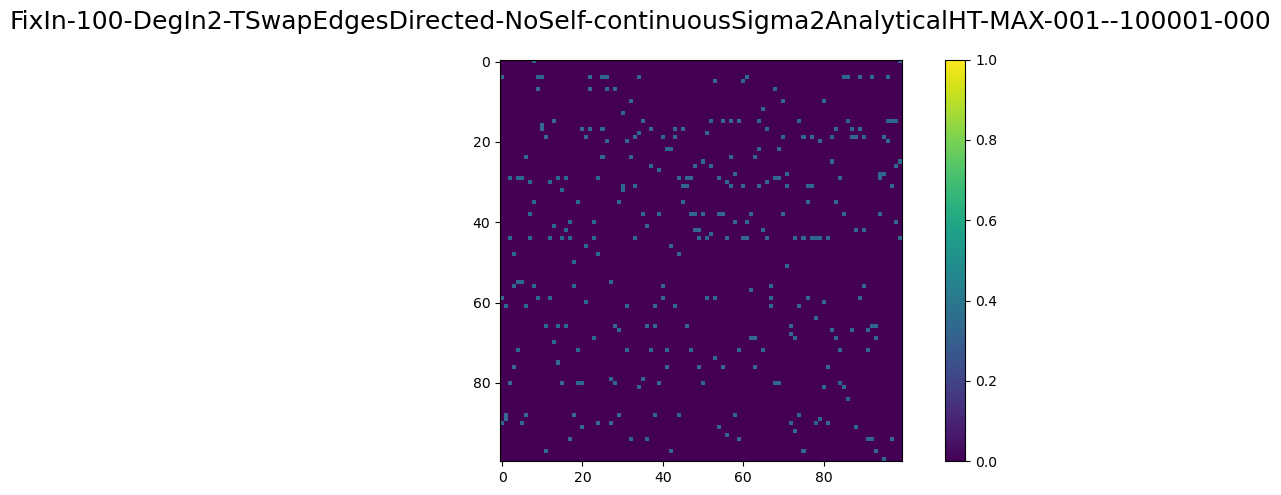

*****************************************
 data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_down_beta_-100001.pkl


In [32]:
import sys
import matplotlib.pyplot as plt
sys.path.append('./Metropolis/')
sys.path.append('./src')
from gvisu import drawMatrix
from measuresFunctions import plotDegreeDistribution, plotInDegreeDistribution, plotOutDegreeDistribution, plotOutEdgeWeightDistribution

kwargs = { 'vmin': 0, 'vmax': 1 }

#FixIn-100-DegIn4-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-FixedW-Continuous-MAX
#FixIn-100-DegIn5-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-continuousSigma2AnalyticalHT-MAX-001
#FixIn-100-DegIn2-TSwapEdgesDirected-NoSelf-continuousSigma2AnalyticalHT-MAX-001_up_beta_100039

for i, row in df.sort_values(by=['beta', 'time'], ascending=True).iterrows():
    print(f'Row {row.experiment} {row.beta} {row.time} - type g {type(row.g)}')
    drawMatrix(row.g, experiment_title=f'{experiment_name}-{row.beta:#07}-{row.time:#03}', folder='./images', showImages=True, **kwargs)
    print('*****************************************\n', row.file)
    plotOutEdgeWeightDistribution(row.g, density=False)
    plt.suptitle(f'{row.file}', size=14)
    plt.show()

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


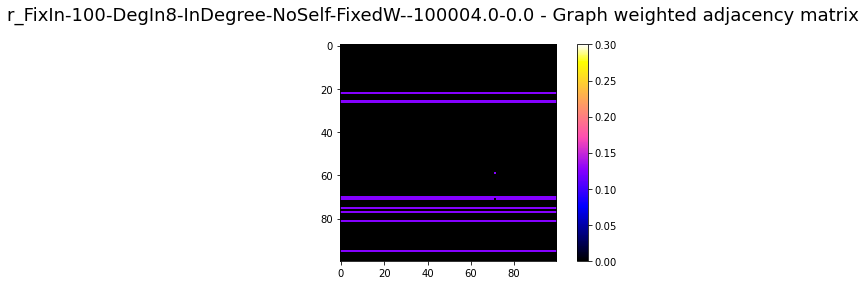

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


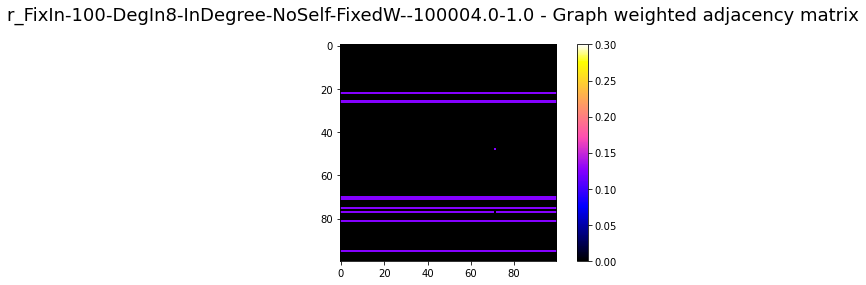

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


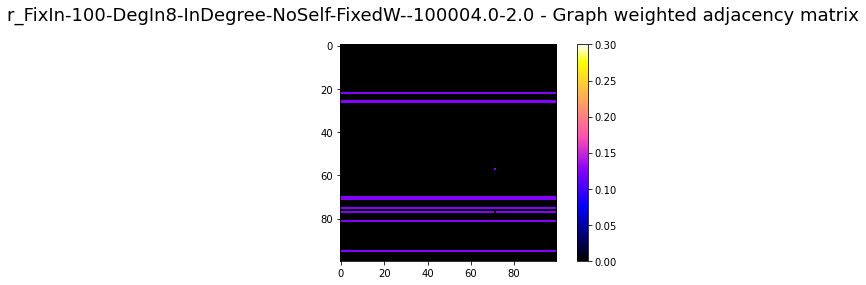

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


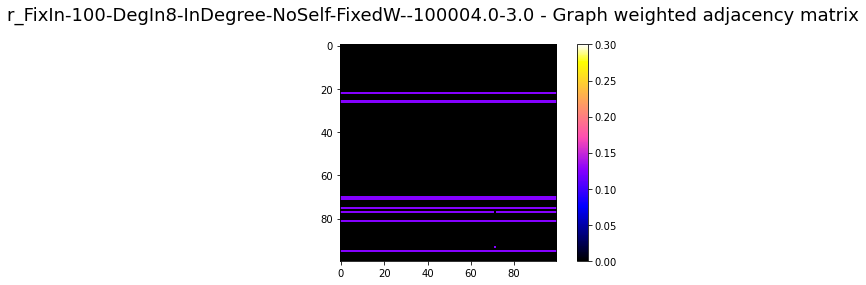

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 5.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 6.0 - type g <class 'networkx.classes.digraph.DiGraph'>


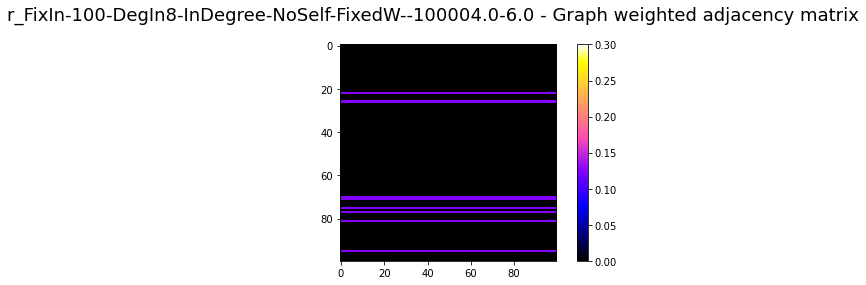

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 7.0 - type g <class 'networkx.classes.digraph.DiGraph'>


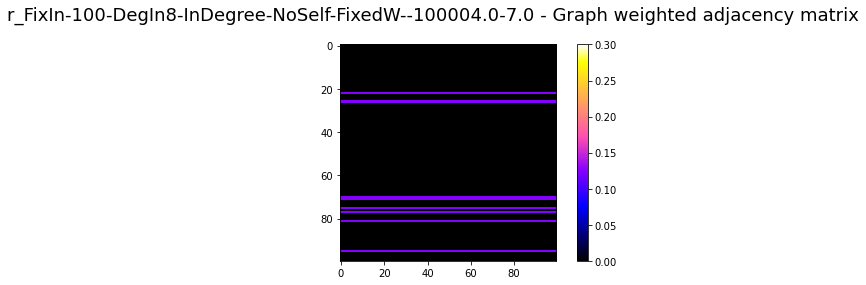

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 8.0 - type g <class 'networkx.classes.digraph.DiGraph'>


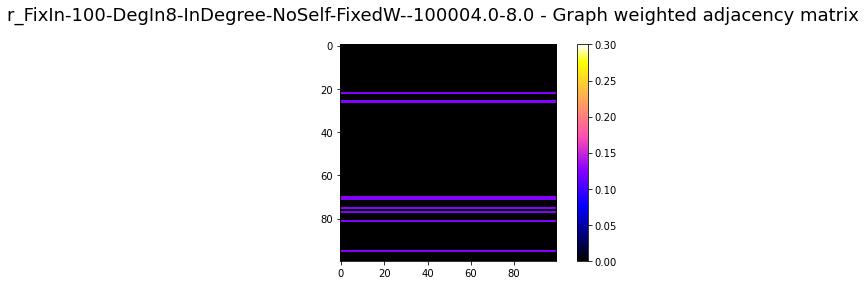

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 9.0 - type g <class 'networkx.classes.digraph.DiGraph'>


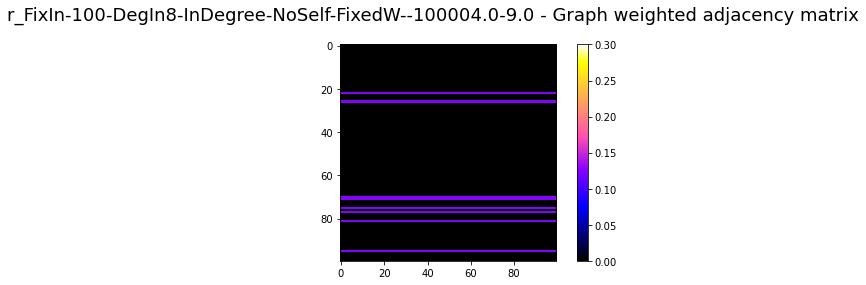

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 10.0 - type g <class 'networkx.classes.digraph.DiGraph'>


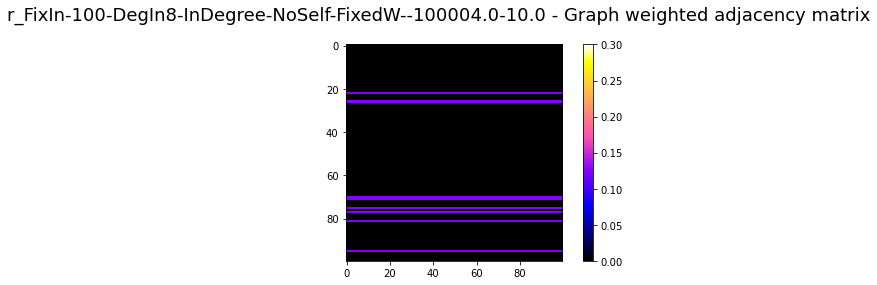

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 11.0 - type g <class 'networkx.classes.digraph.DiGraph'>


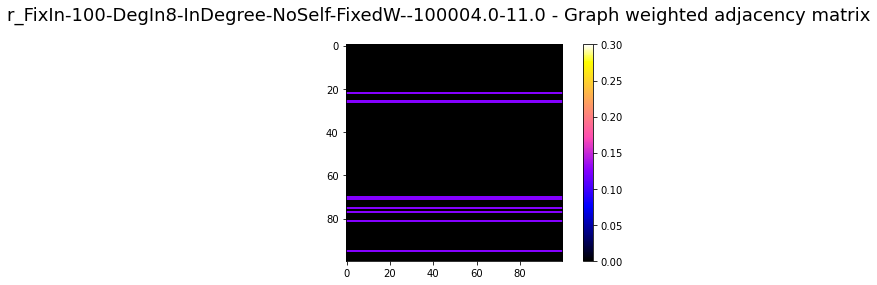

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 12.0 - type g <class 'networkx.classes.digraph.DiGraph'>


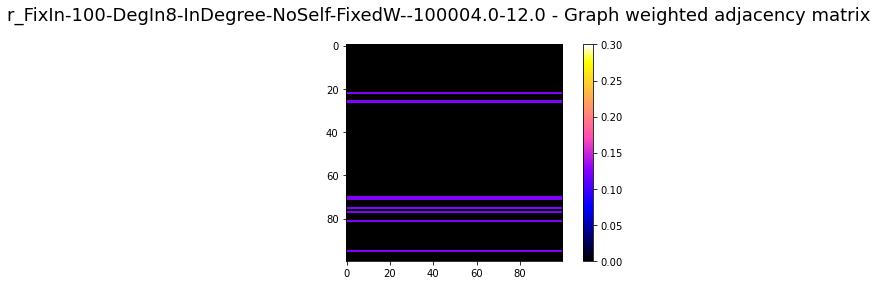

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 13.0 - type g <class 'networkx.classes.digraph.DiGraph'>


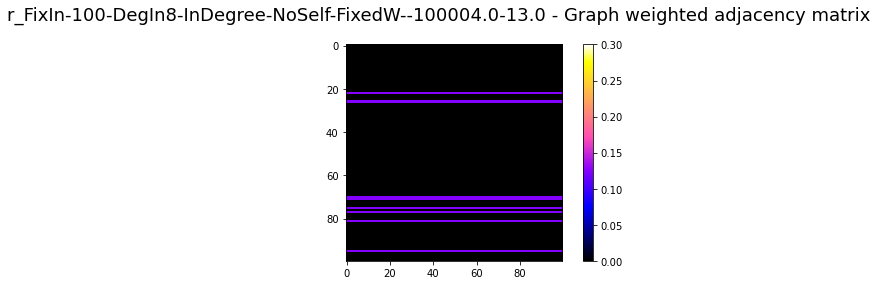

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 14.0 - type g <class 'networkx.classes.digraph.DiGraph'>


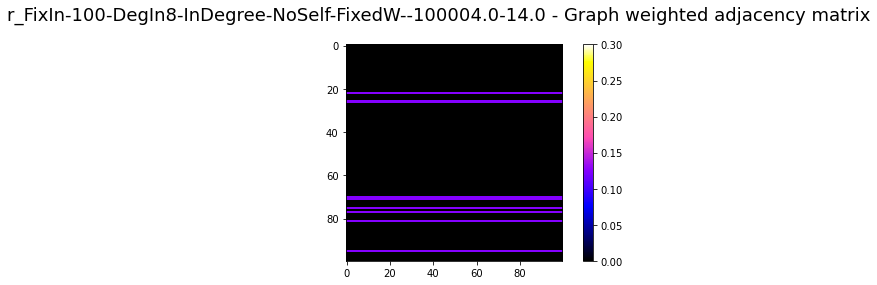

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 15.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 16.0 - type g <class 'networkx.classes.digraph.DiGraph'>


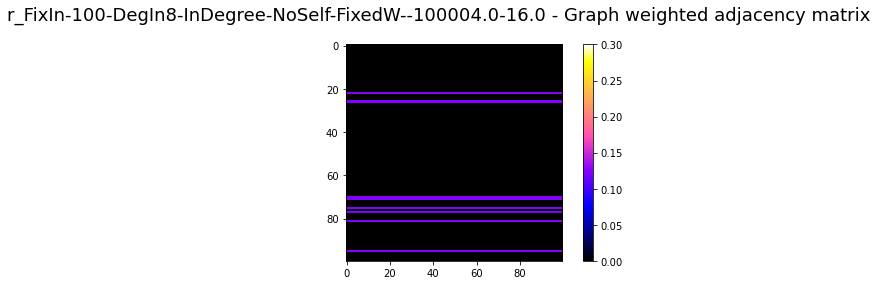

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 17.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 18.0 - type g <class 'networkx.classes.digraph.DiGraph'>


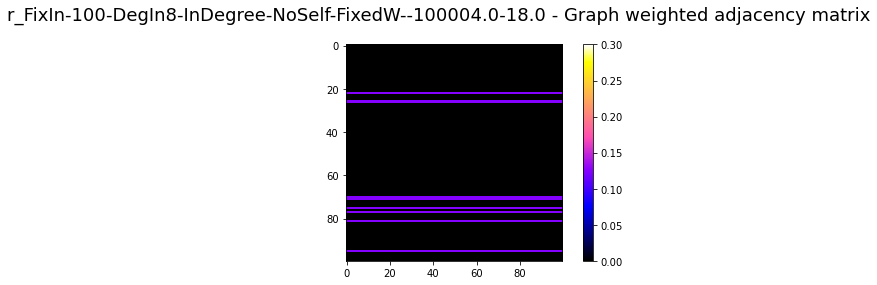

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100004.0 19.0 - type g <class 'networkx.classes.digraph.DiGraph'>


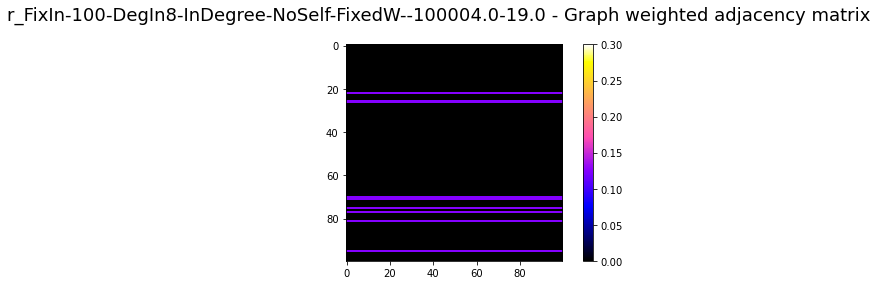

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


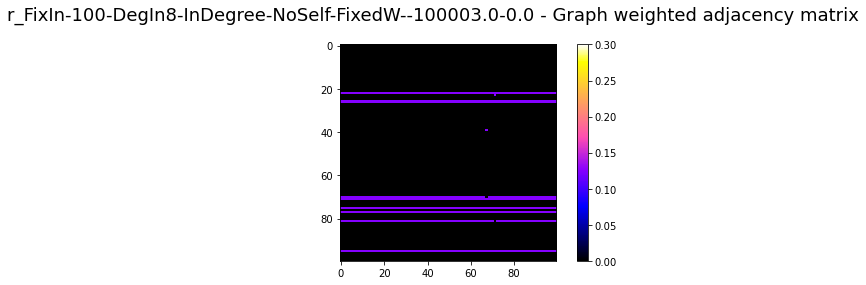

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


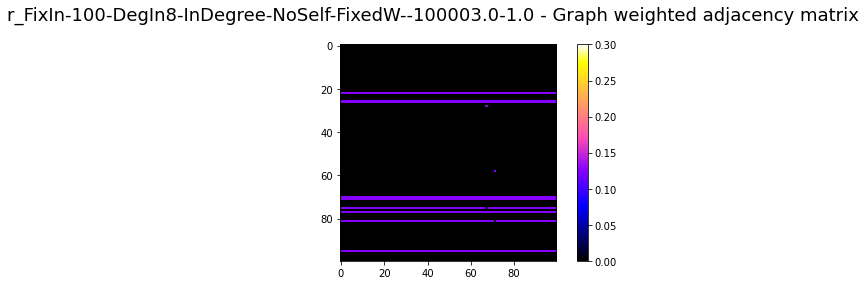

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


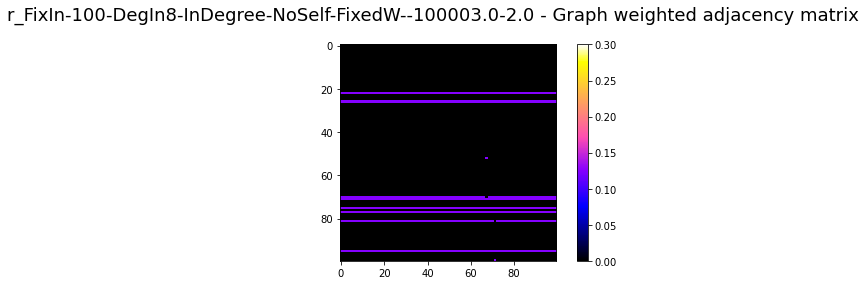

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


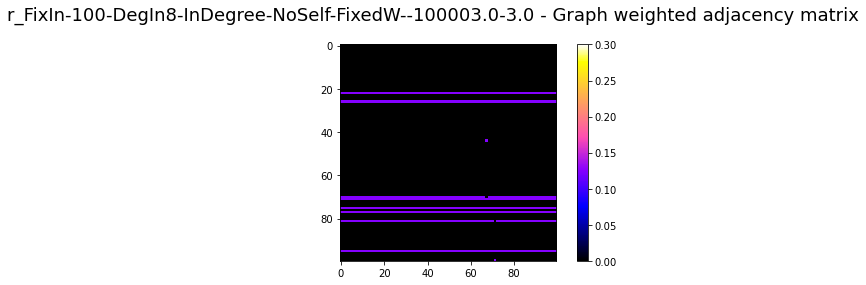

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 5.0 - type g <class 'networkx.classes.digraph.DiGraph'>


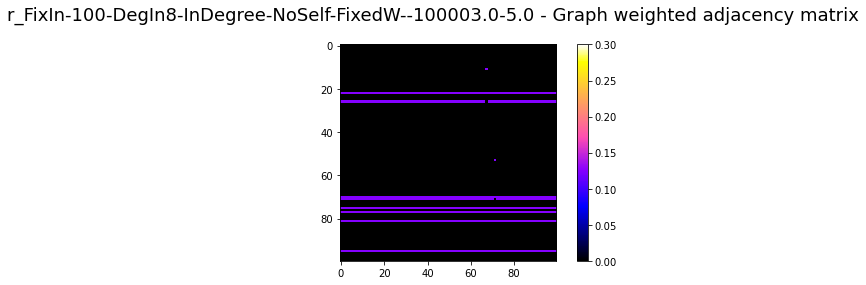

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 6.0 - type g <class 'networkx.classes.digraph.DiGraph'>


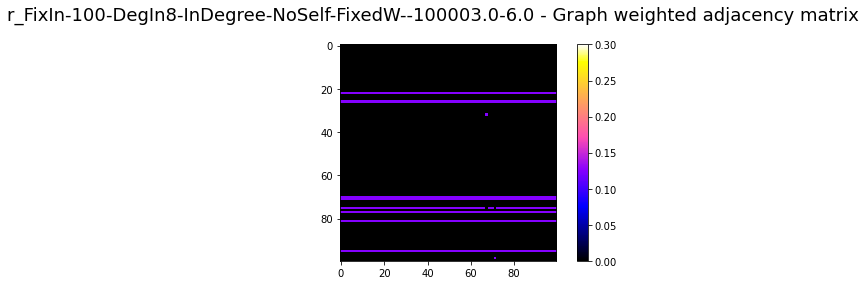

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 7.0 - type g <class 'networkx.classes.digraph.DiGraph'>


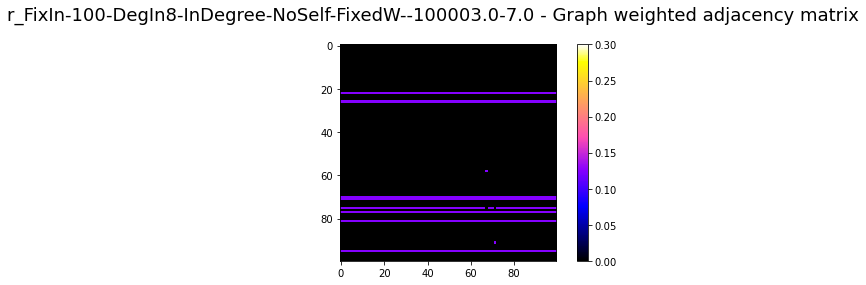

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 8.0 - type g <class 'networkx.classes.digraph.DiGraph'>


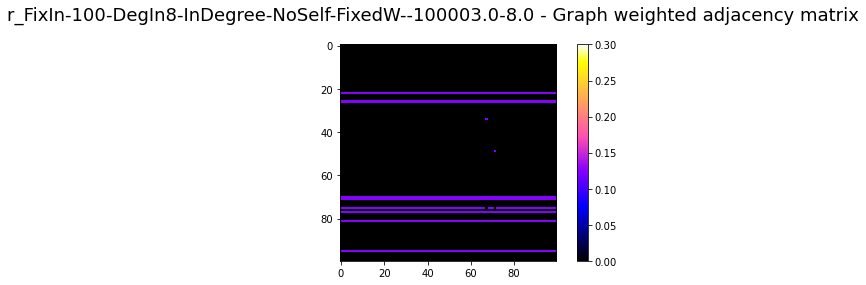

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 9.0 - type g <class 'networkx.classes.digraph.DiGraph'>


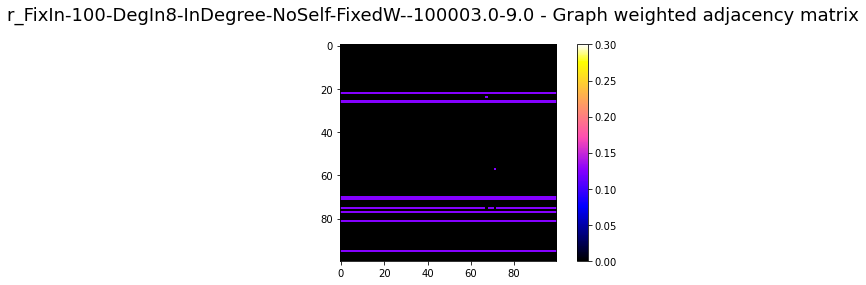

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 10.0 - type g <class 'networkx.classes.digraph.DiGraph'>


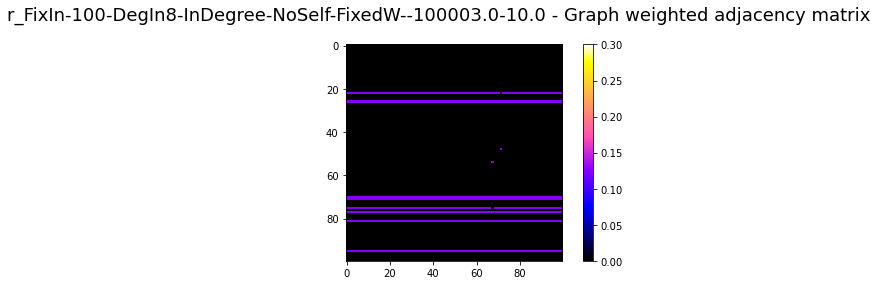

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 11.0 - type g <class 'networkx.classes.digraph.DiGraph'>


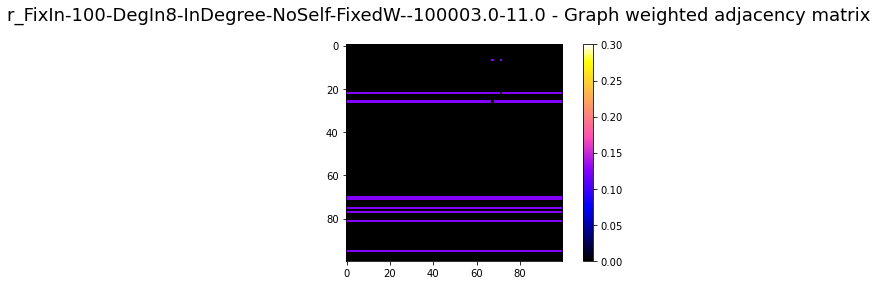

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 12.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 13.0 - type g <class 'networkx.classes.digraph.DiGraph'>


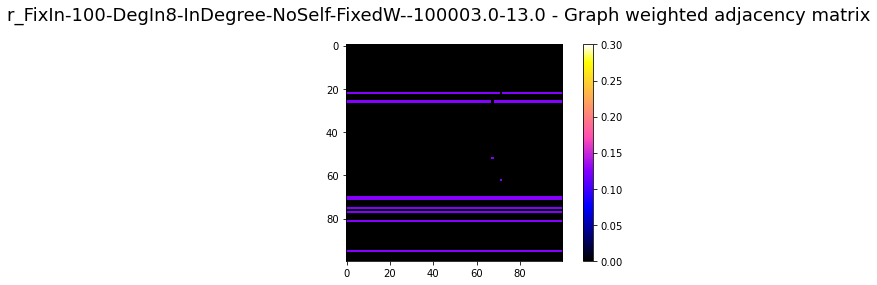

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 14.0 - type g <class 'networkx.classes.digraph.DiGraph'>


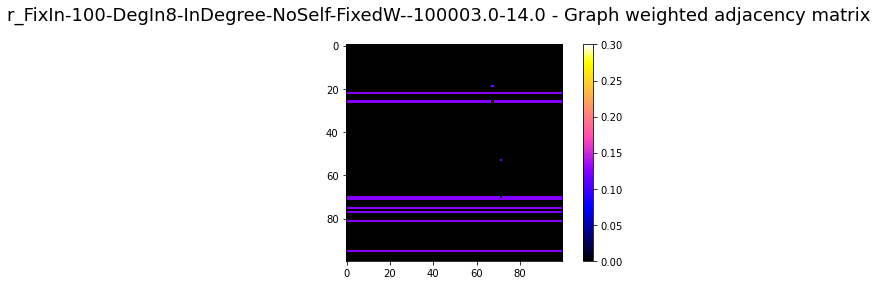

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 15.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 16.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 17.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 18.0 - type g <class 'networkx.classes.digraph.DiGraph'>


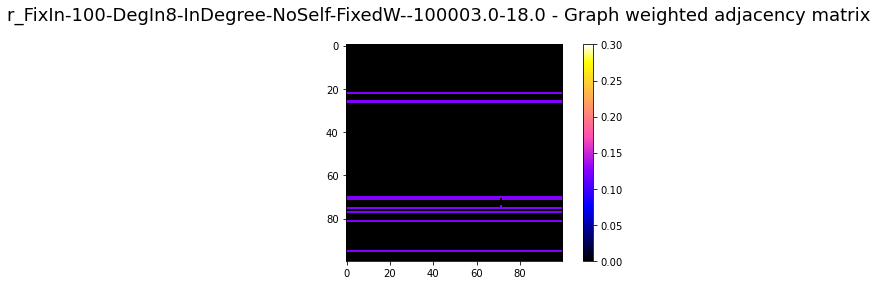

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100003.0 19.0 - type g <class 'networkx.classes.digraph.DiGraph'>


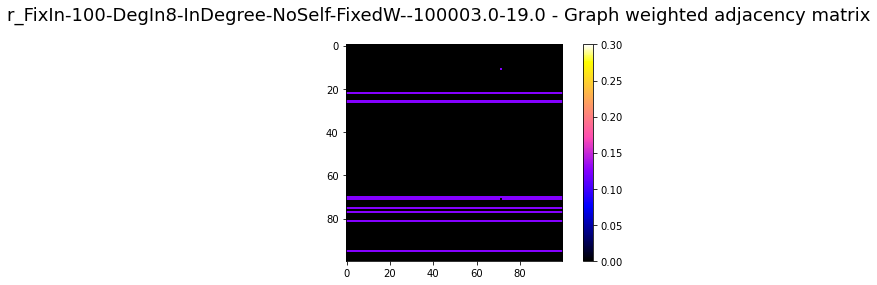

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


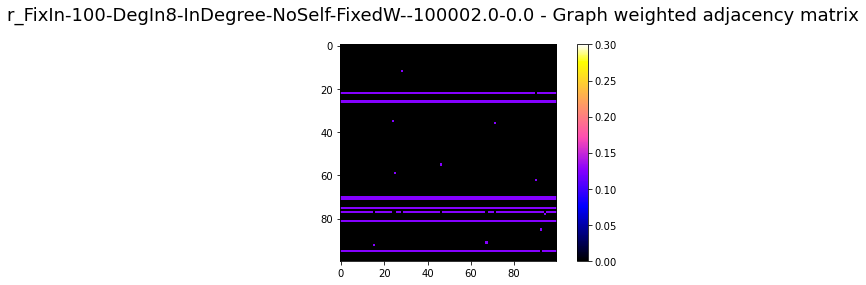

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


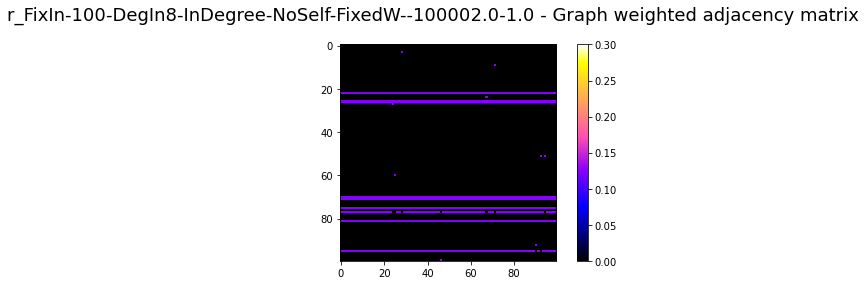

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


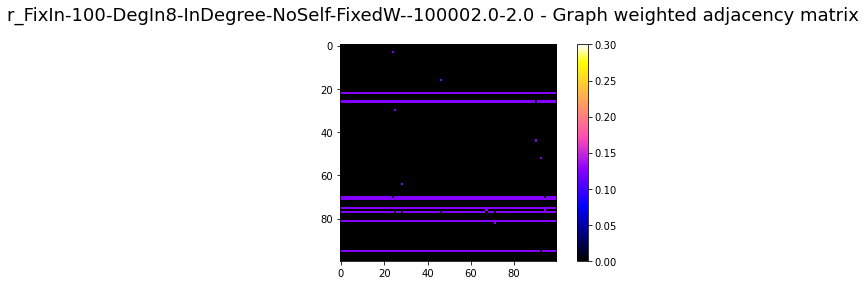

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


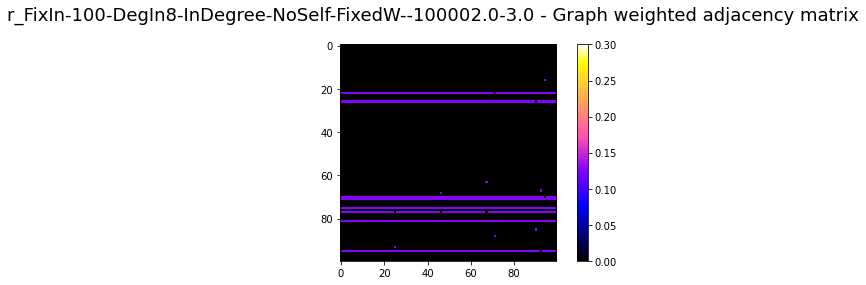

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


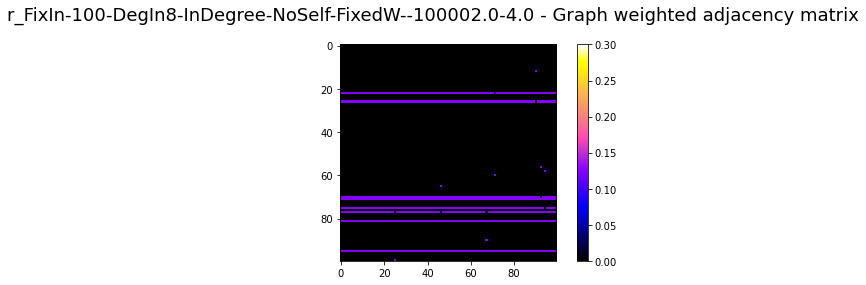

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 5.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 6.0 - type g <class 'networkx.classes.digraph.DiGraph'>


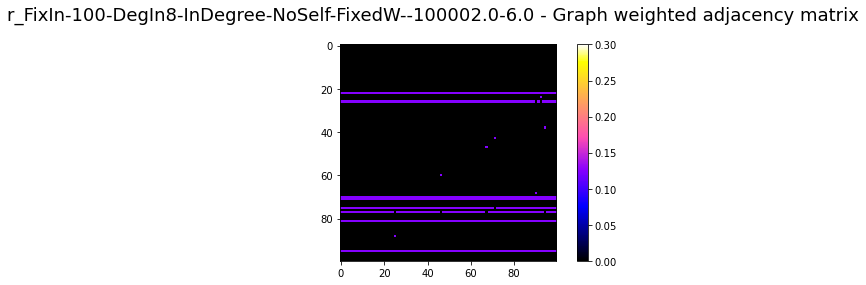

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 7.0 - type g <class 'networkx.classes.digraph.DiGraph'>


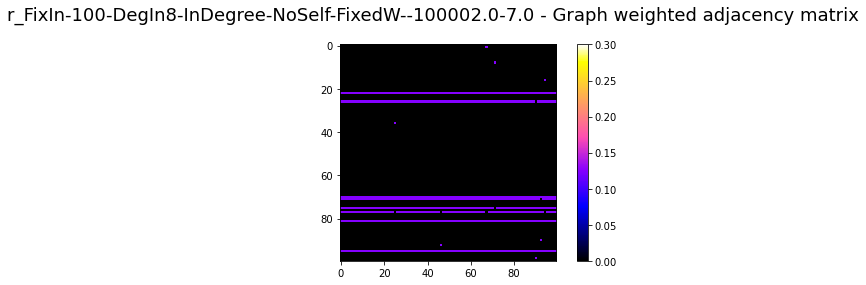

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 8.0 - type g <class 'networkx.classes.digraph.DiGraph'>


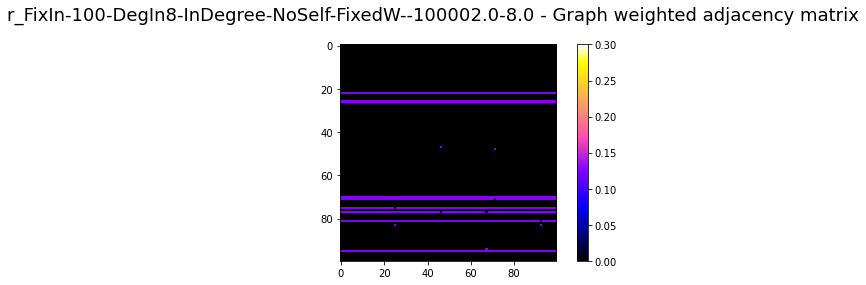

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 9.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 10.0 - type g <class 'networkx.classes.digraph.DiGraph'>


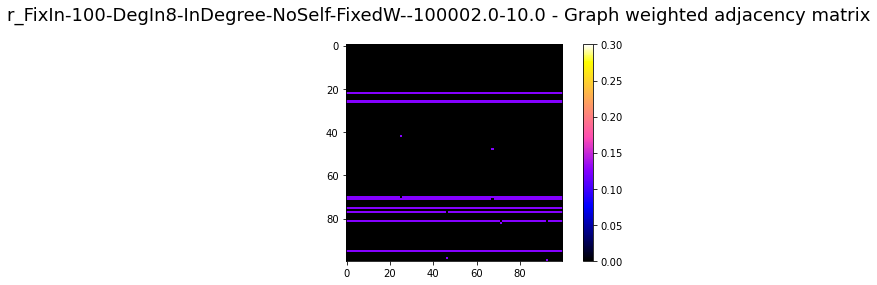

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 11.0 - type g <class 'networkx.classes.digraph.DiGraph'>


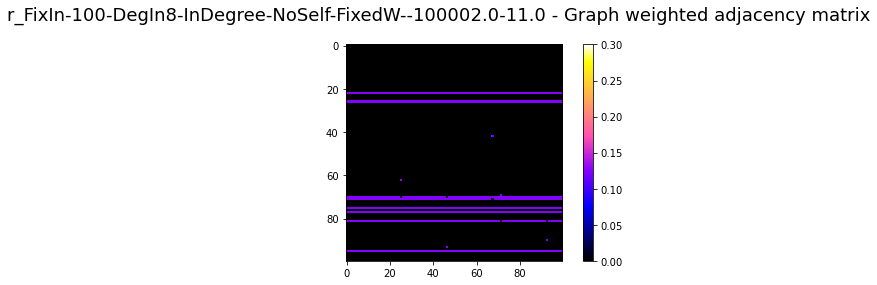

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 12.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 13.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 14.0 - type g <class 'networkx.classes.digraph.DiGraph'>


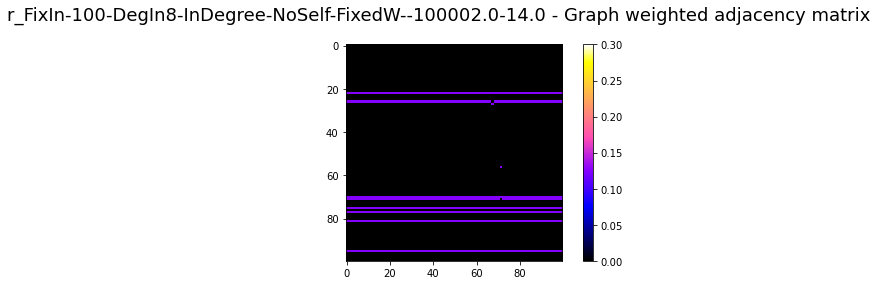

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 15.0 - type g <class 'networkx.classes.digraph.DiGraph'>


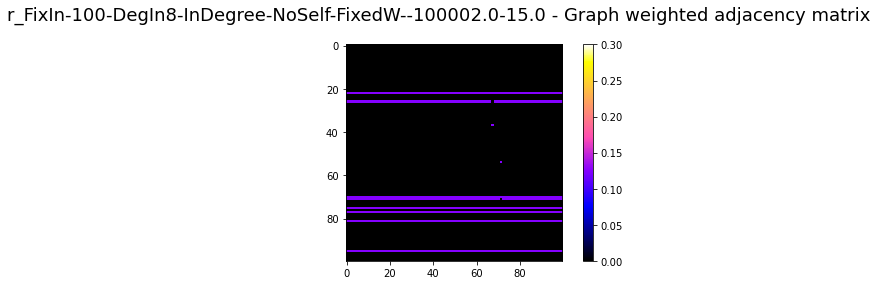

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 16.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 17.0 - type g <class 'networkx.classes.digraph.DiGraph'>


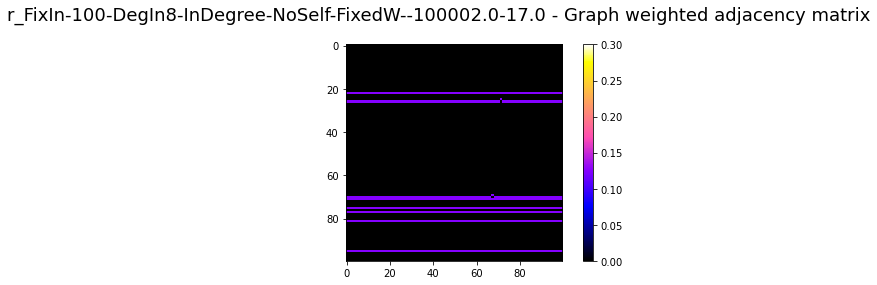

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 18.0 - type g <class 'networkx.classes.digraph.DiGraph'>


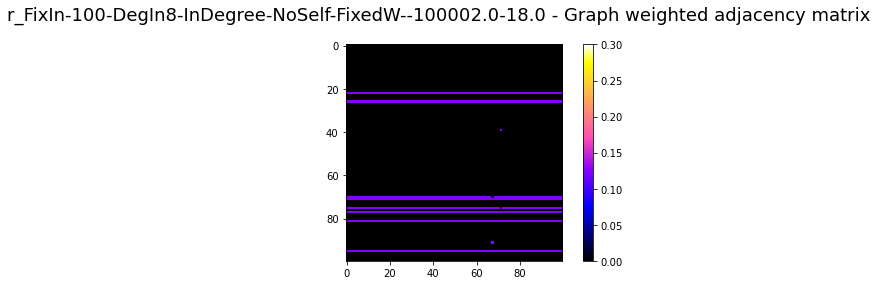

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100002.0 19.0 - type g <class 'networkx.classes.digraph.DiGraph'>


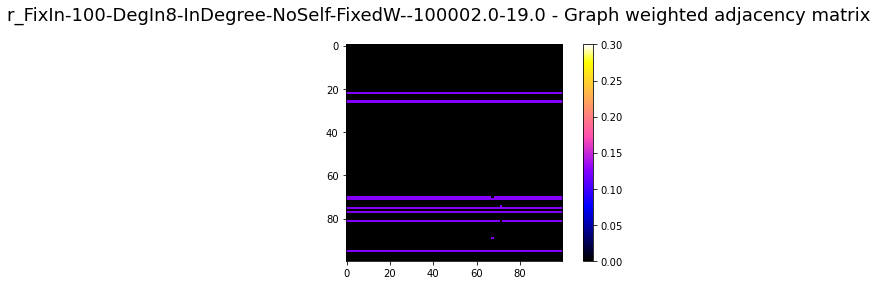

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


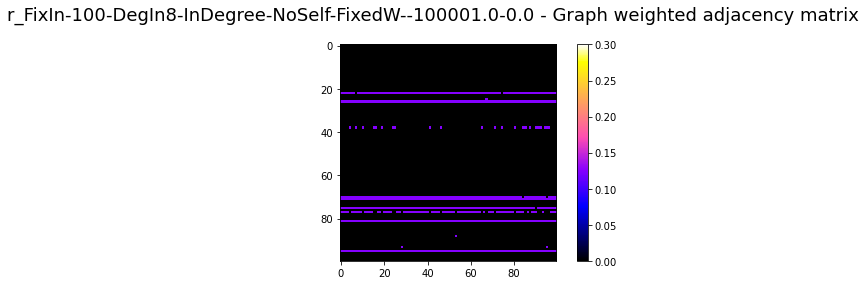

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


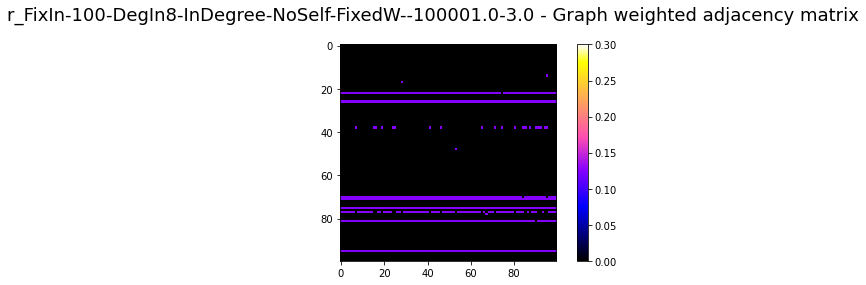

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


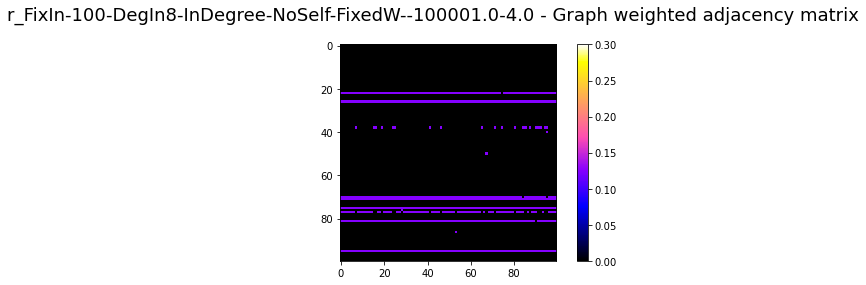

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 5.0 - type g <class 'networkx.classes.digraph.DiGraph'>


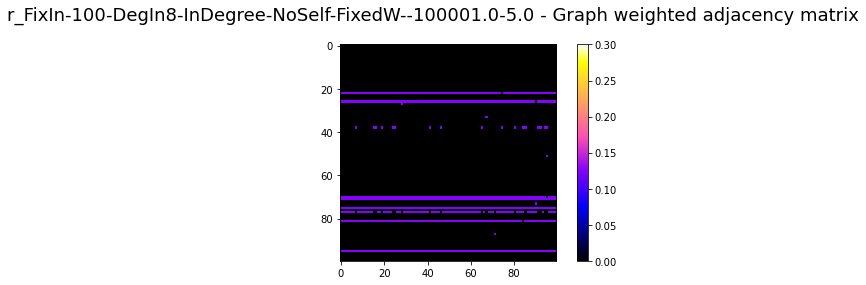

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 6.0 - type g <class 'networkx.classes.digraph.DiGraph'>


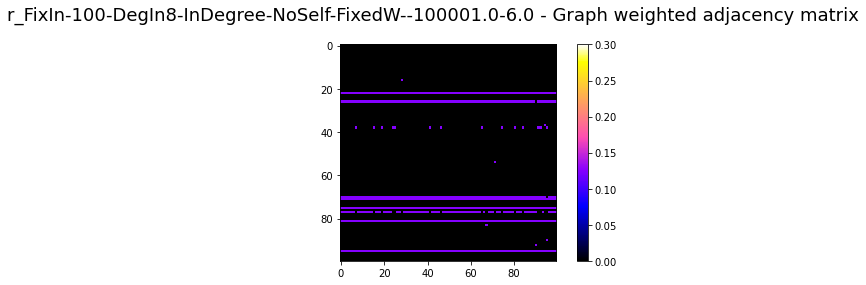

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 7.0 - type g <class 'networkx.classes.digraph.DiGraph'>


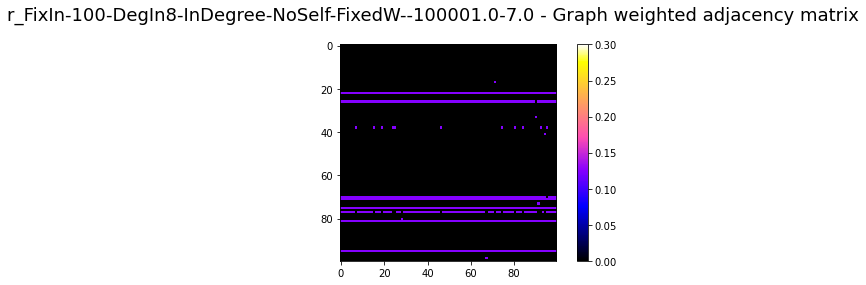

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 8.0 - type g <class 'networkx.classes.digraph.DiGraph'>


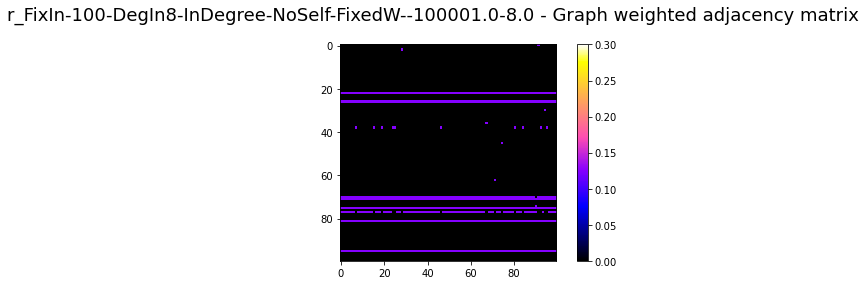

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 9.0 - type g <class 'networkx.classes.digraph.DiGraph'>


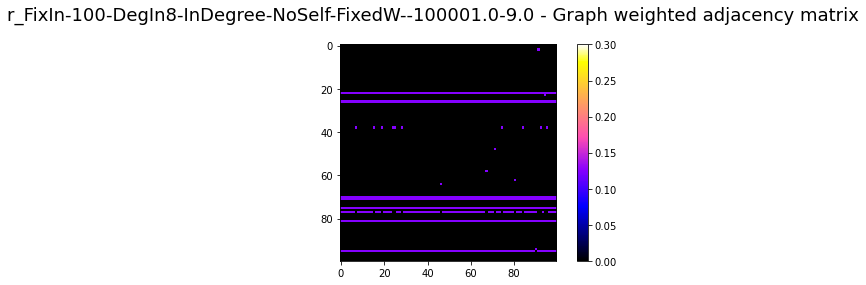

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 10.0 - type g <class 'networkx.classes.digraph.DiGraph'>


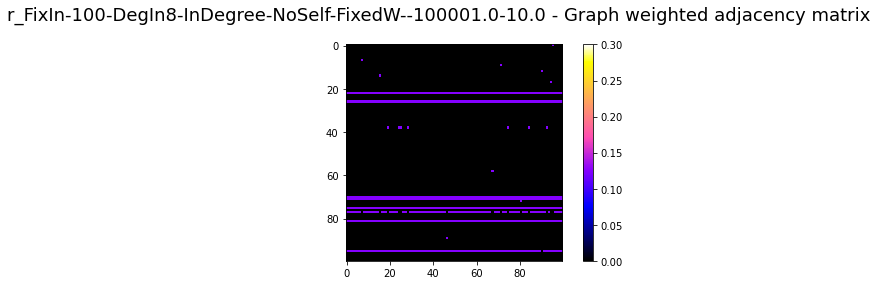

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 11.0 - type g <class 'networkx.classes.digraph.DiGraph'>


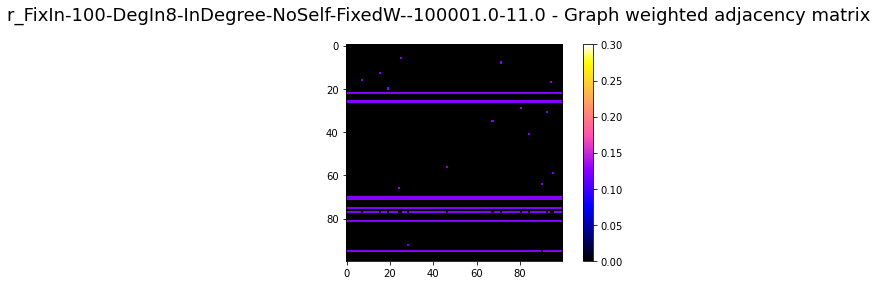

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 12.0 - type g <class 'networkx.classes.digraph.DiGraph'>


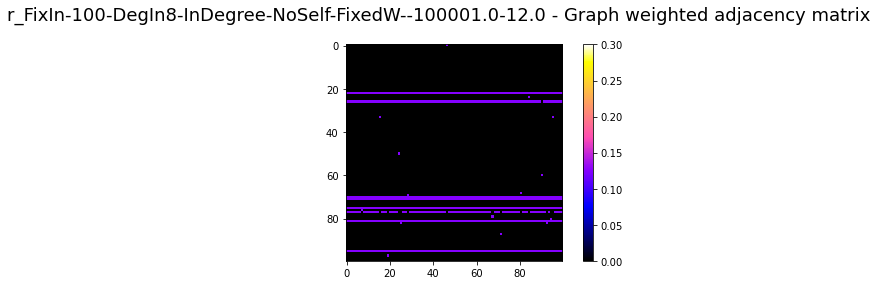

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 13.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 14.0 - type g <class 'networkx.classes.digraph.DiGraph'>


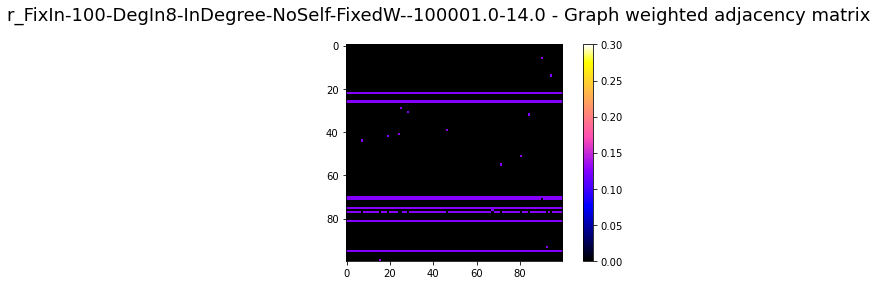

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 15.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 16.0 - type g <class 'networkx.classes.digraph.DiGraph'>


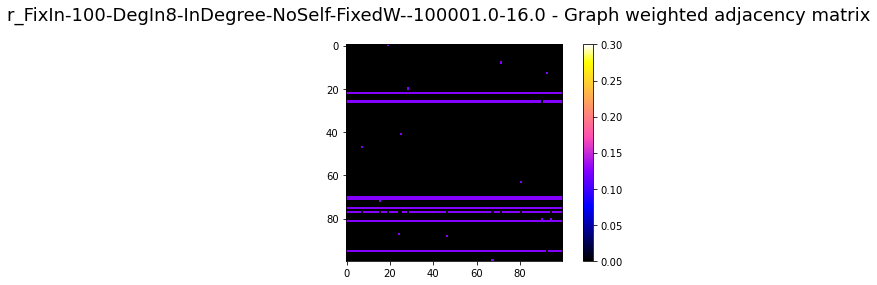

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 17.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 18.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100001.0 19.0 - type g <class 'networkx.classes.digraph.DiGraph'>


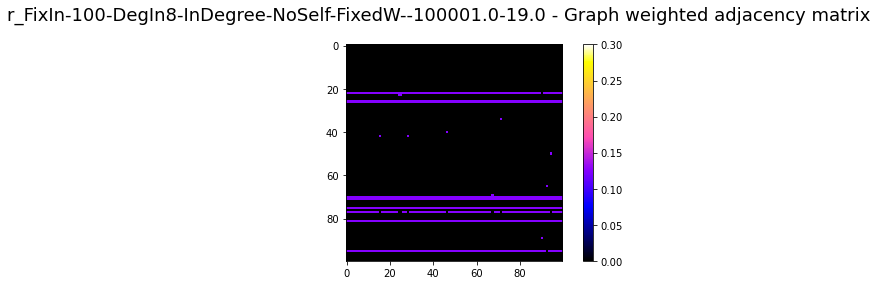

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


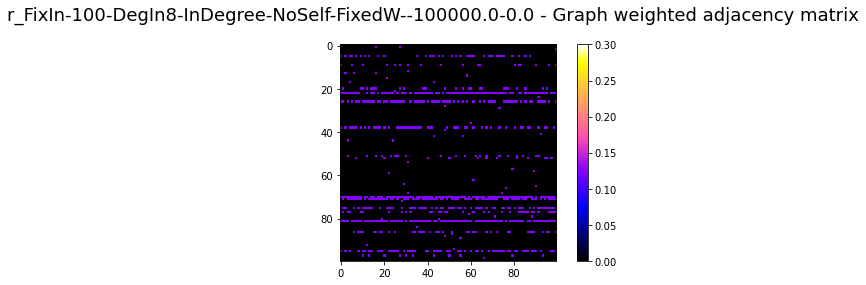

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


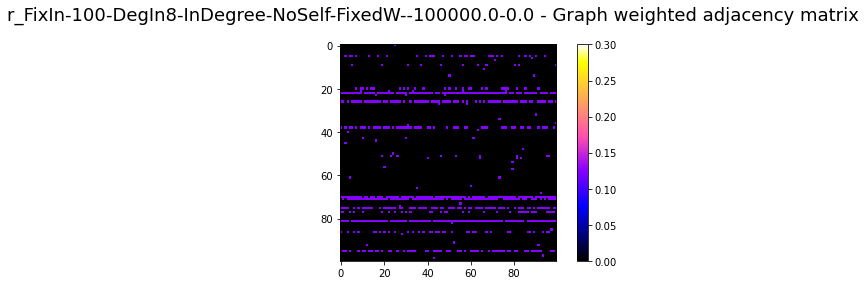

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


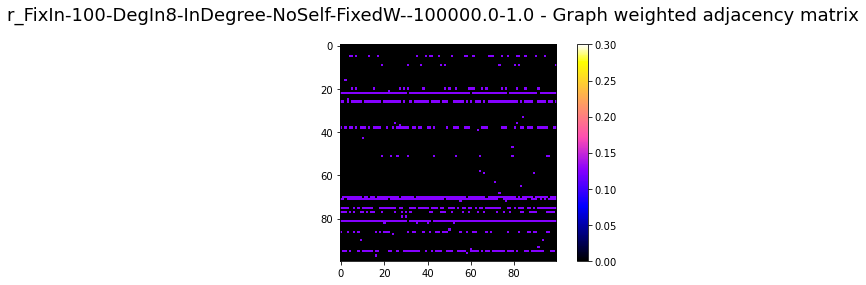

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


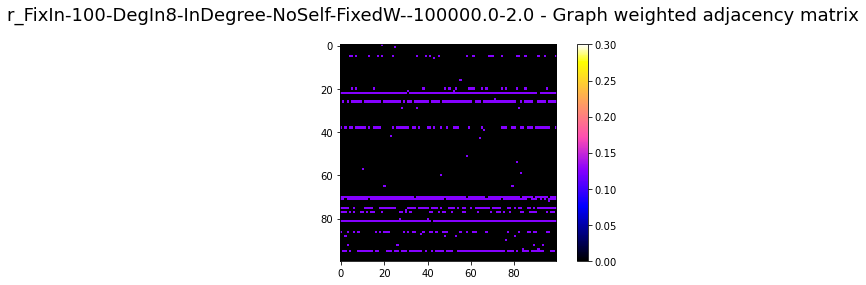

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


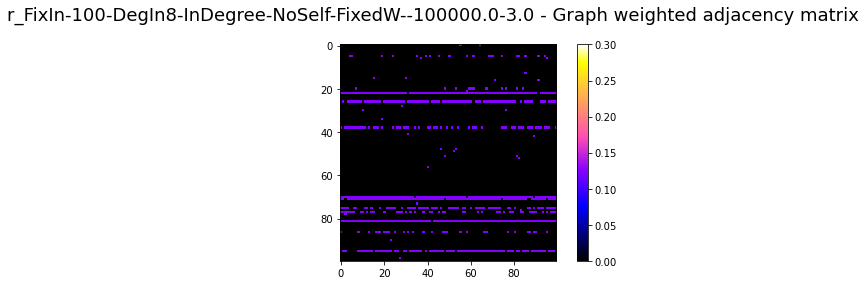

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


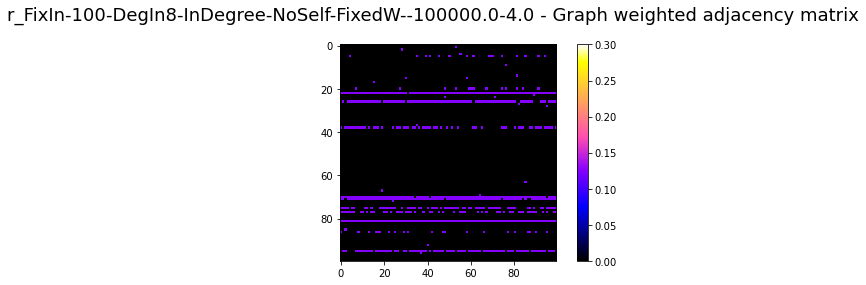

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 5.0 - type g <class 'networkx.classes.digraph.DiGraph'>


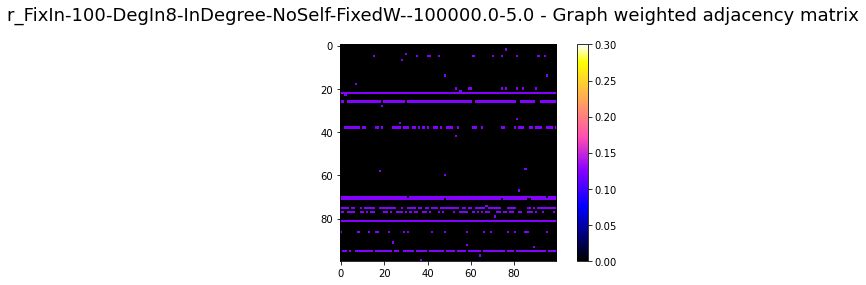

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 6.0 - type g <class 'networkx.classes.digraph.DiGraph'>


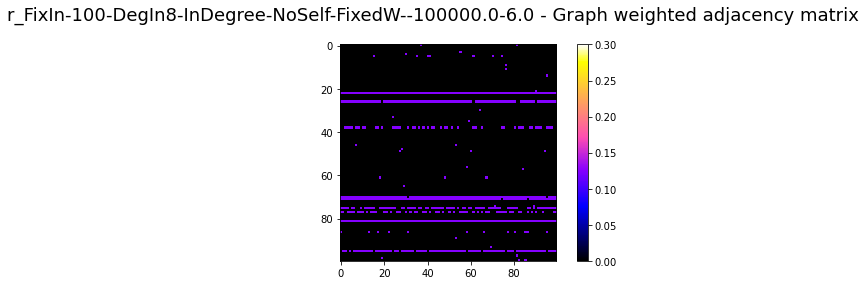

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 7.0 - type g <class 'networkx.classes.digraph.DiGraph'>


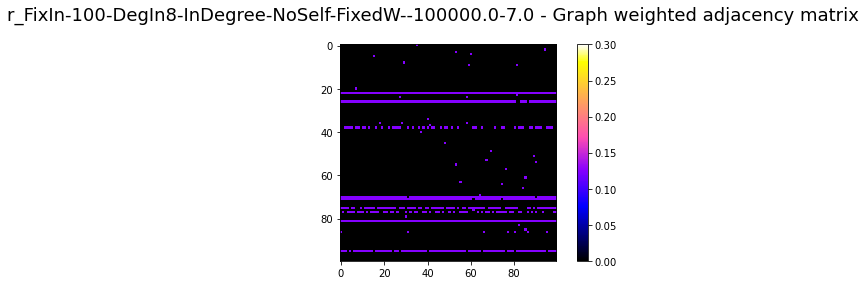

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 8.0 - type g <class 'networkx.classes.digraph.DiGraph'>


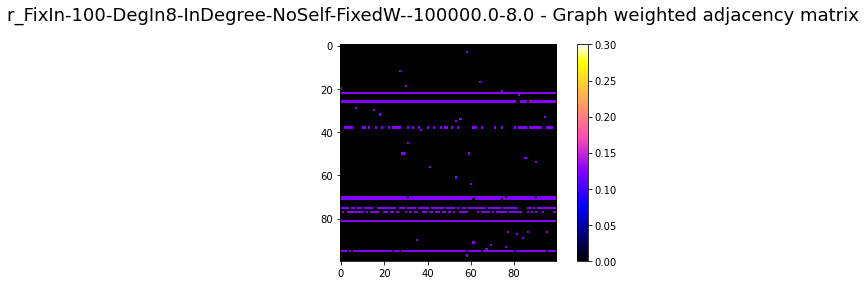

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 9.0 - type g <class 'networkx.classes.digraph.DiGraph'>


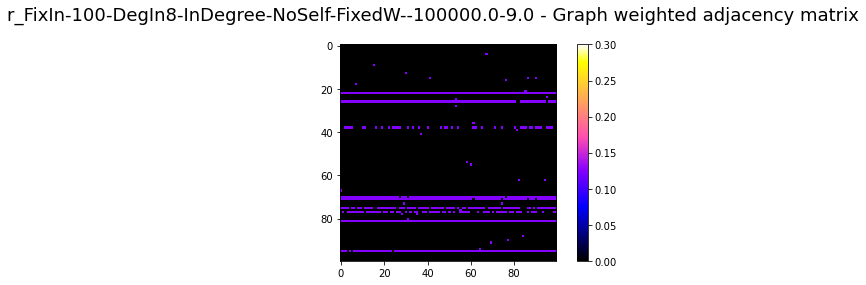

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 10.0 - type g <class 'networkx.classes.digraph.DiGraph'>


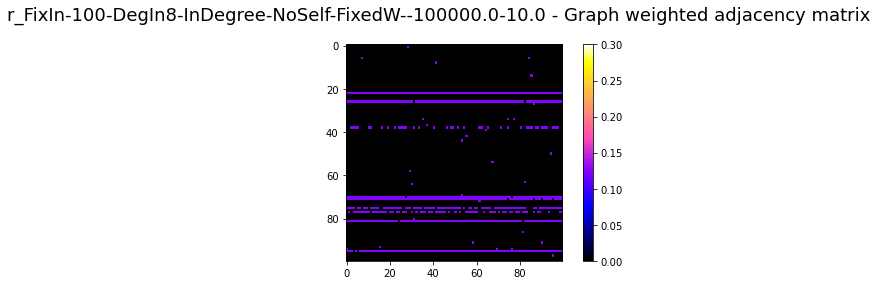

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 11.0 - type g <class 'networkx.classes.digraph.DiGraph'>


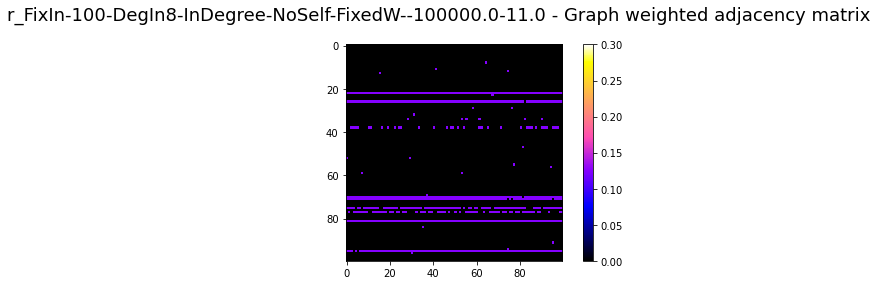

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 12.0 - type g <class 'networkx.classes.digraph.DiGraph'>


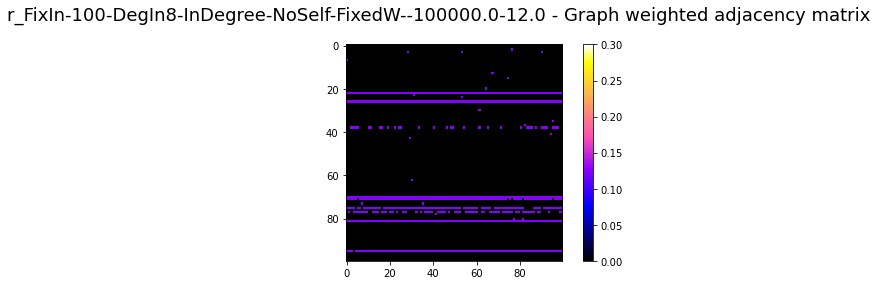

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 13.0 - type g <class 'networkx.classes.digraph.DiGraph'>


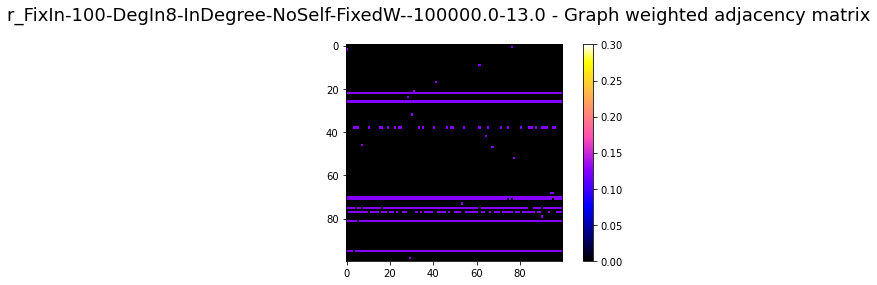

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 14.0 - type g <class 'networkx.classes.digraph.DiGraph'>


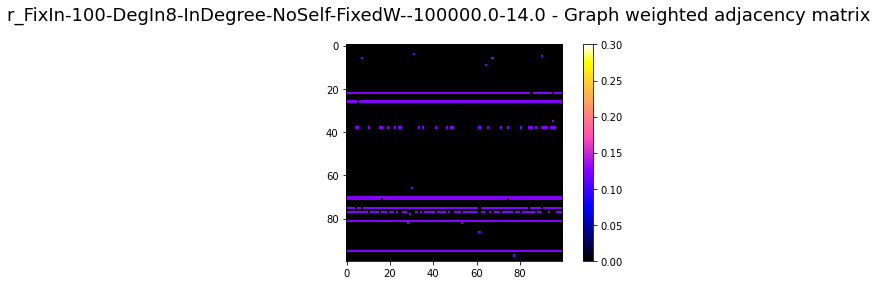

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 15.0 - type g <class 'networkx.classes.digraph.DiGraph'>


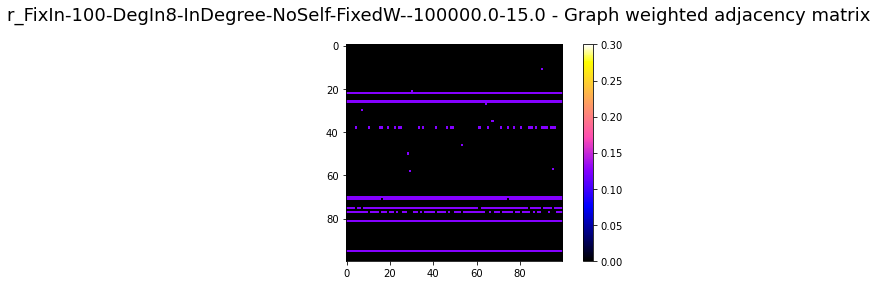

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 16.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 17.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 18.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW -100000.0 19.0 - type g <class 'networkx.classes.digraph.DiGraph'>


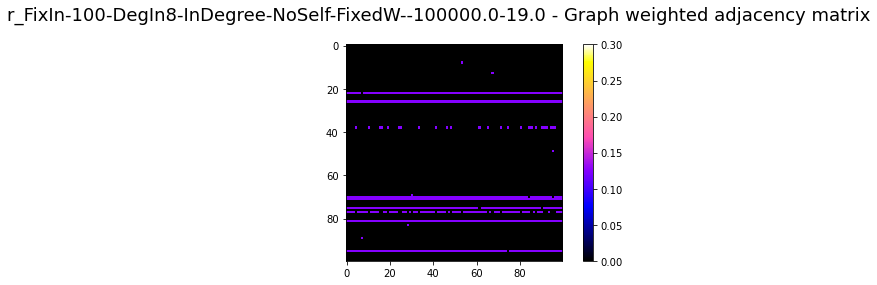

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


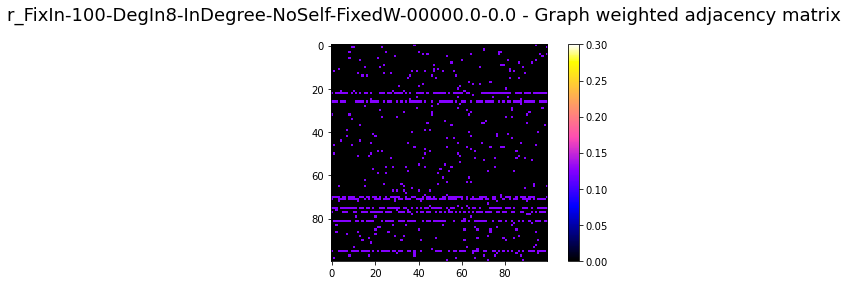

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


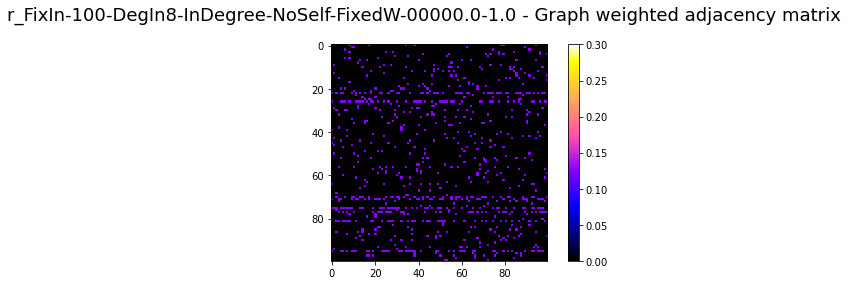

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


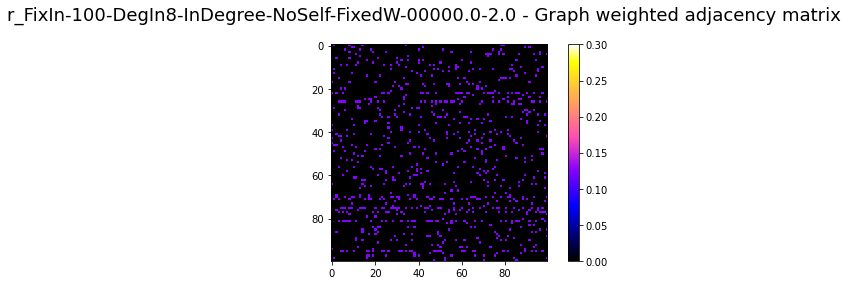

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


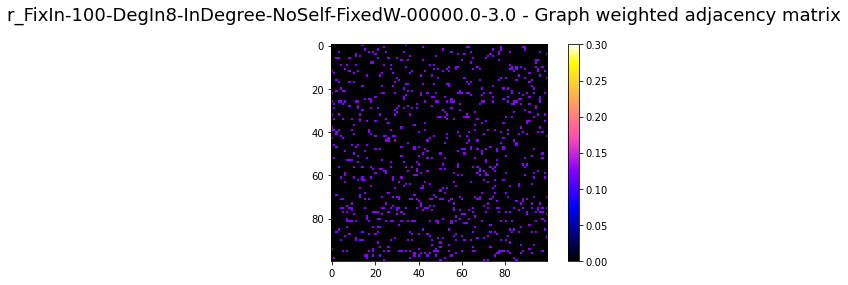

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


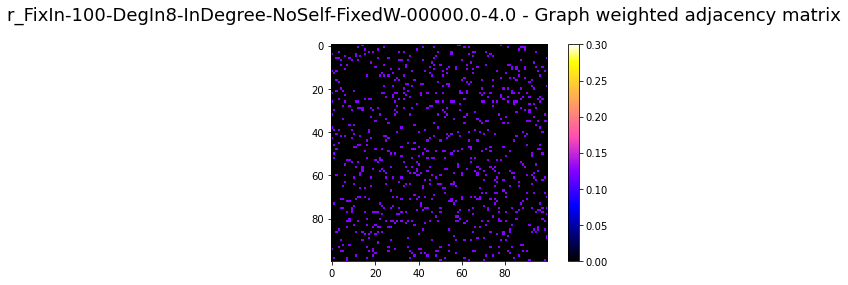

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 5.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 6.0 - type g <class 'networkx.classes.digraph.DiGraph'>


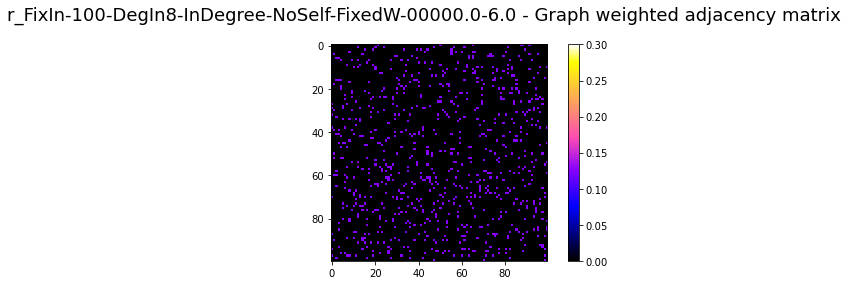

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 7.0 - type g <class 'networkx.classes.digraph.DiGraph'>


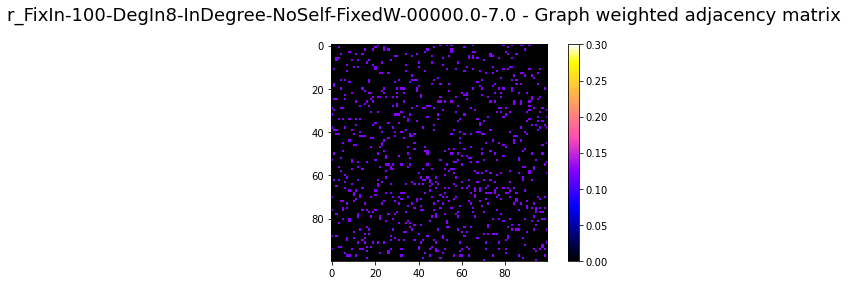

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 8.0 - type g <class 'networkx.classes.digraph.DiGraph'>


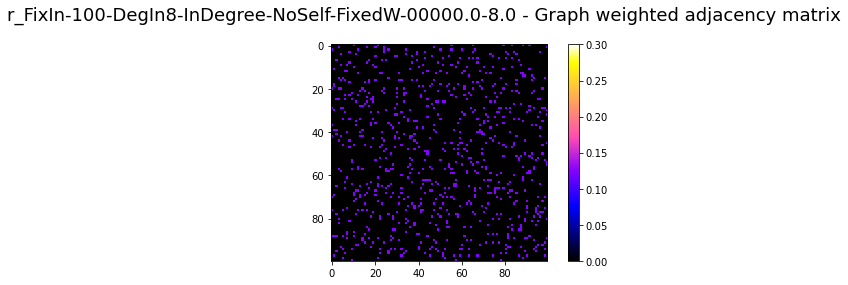

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 9.0 - type g <class 'networkx.classes.digraph.DiGraph'>


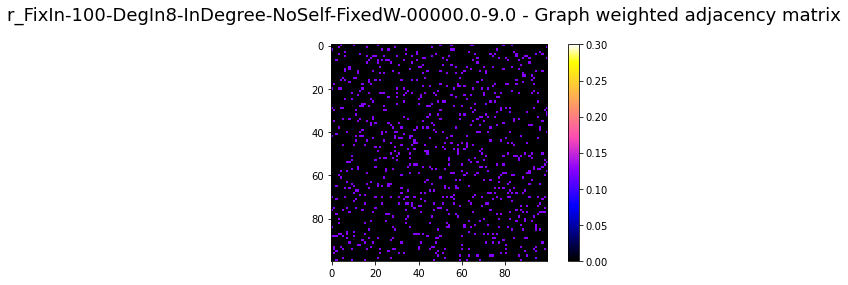

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 10.0 - type g <class 'networkx.classes.digraph.DiGraph'>


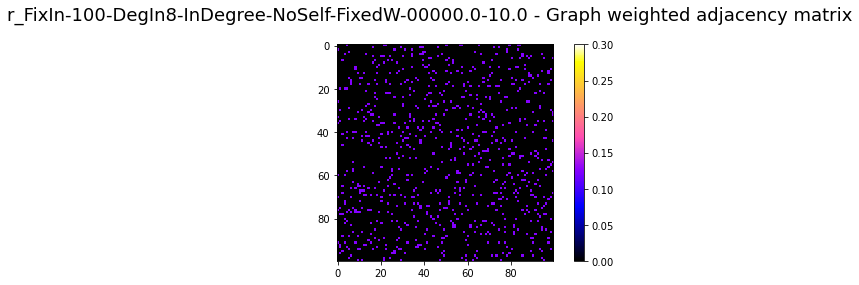

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 11.0 - type g <class 'networkx.classes.digraph.DiGraph'>


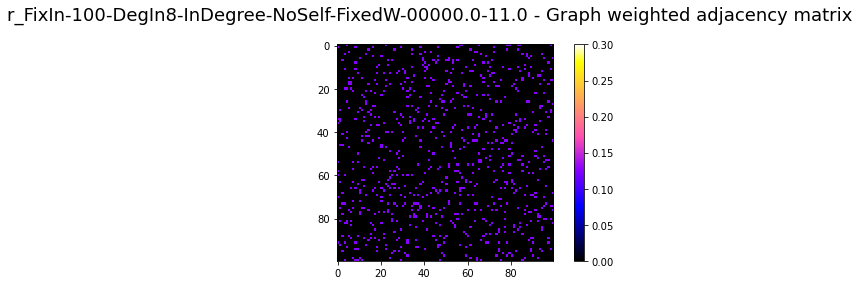

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 12.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 13.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 14.0 - type g <class 'networkx.classes.digraph.DiGraph'>


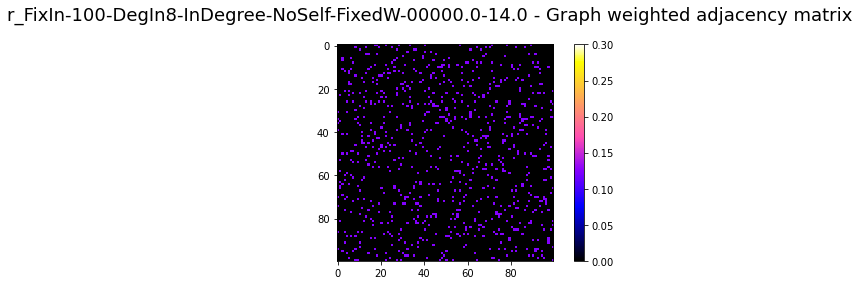

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 15.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 16.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 17.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 18.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 0.0 19.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


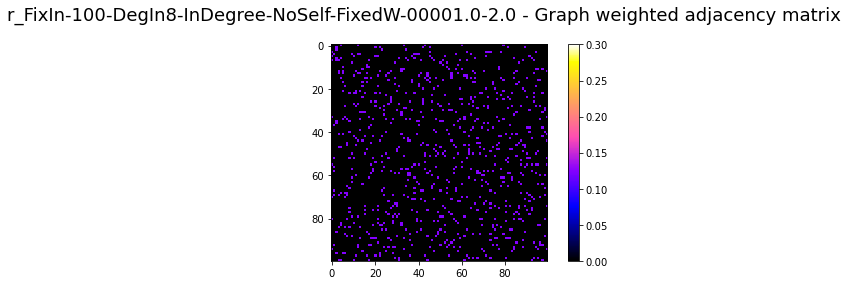

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 5.0 - type g <class 'networkx.classes.digraph.DiGraph'>


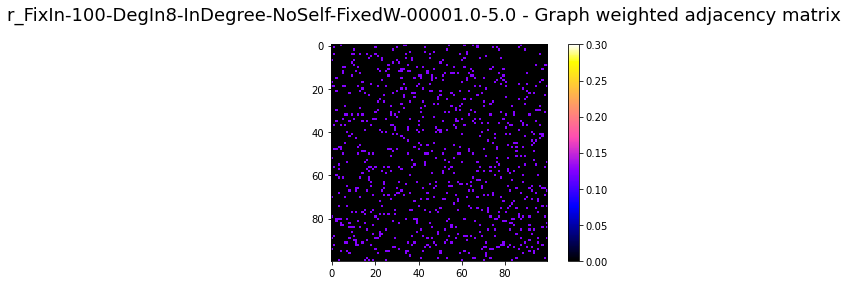

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 6.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 7.0 - type g <class 'networkx.classes.digraph.DiGraph'>


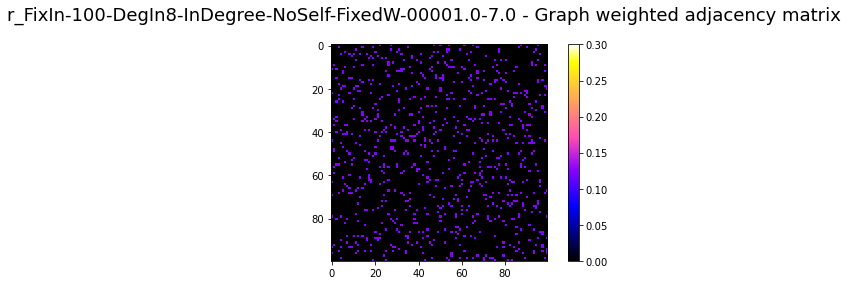

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 8.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 9.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 10.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 11.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 12.0 - type g <class 'networkx.classes.digraph.DiGraph'>


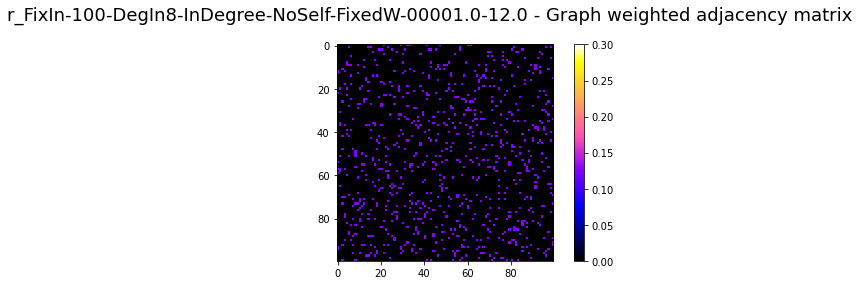

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 13.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 14.0 - type g <class 'networkx.classes.digraph.DiGraph'>


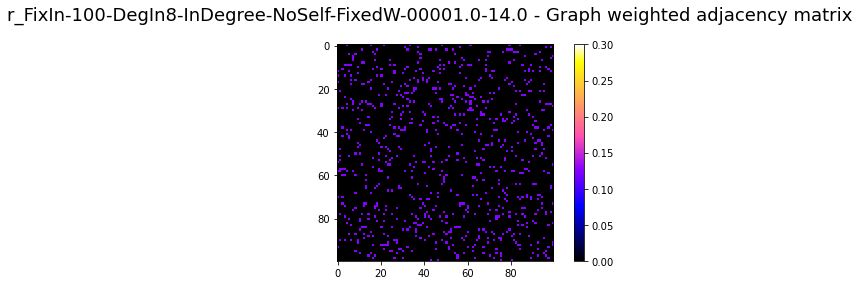

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 15.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 16.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 17.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 18.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 1.0 19.0 - type g <class 'networkx.classes.digraph.DiGraph'>


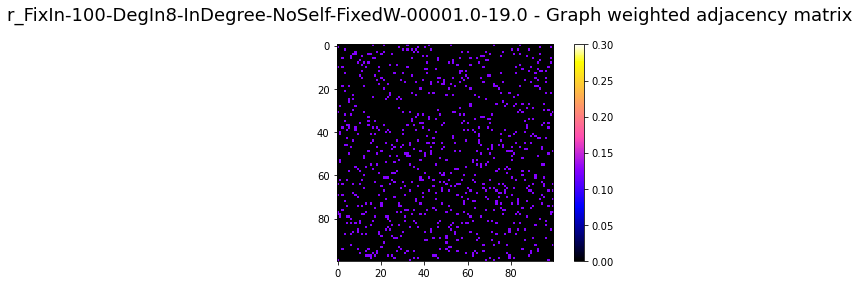

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


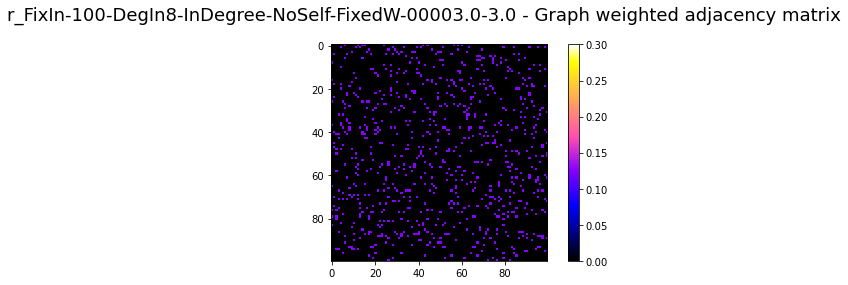

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


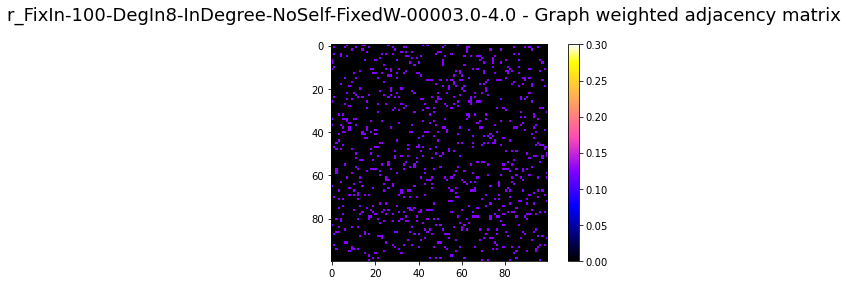

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 5.0 - type g <class 'networkx.classes.digraph.DiGraph'>


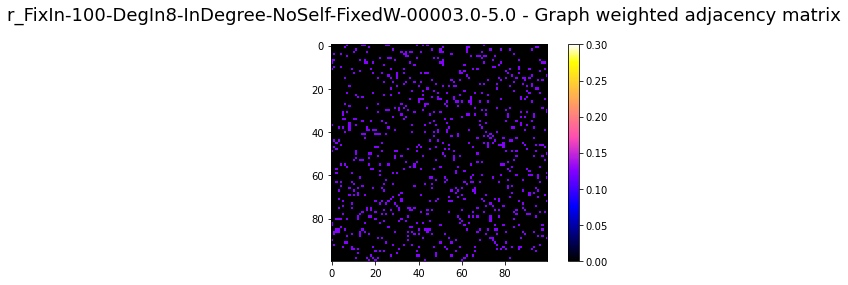

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 6.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 7.0 - type g <class 'networkx.classes.digraph.DiGraph'>


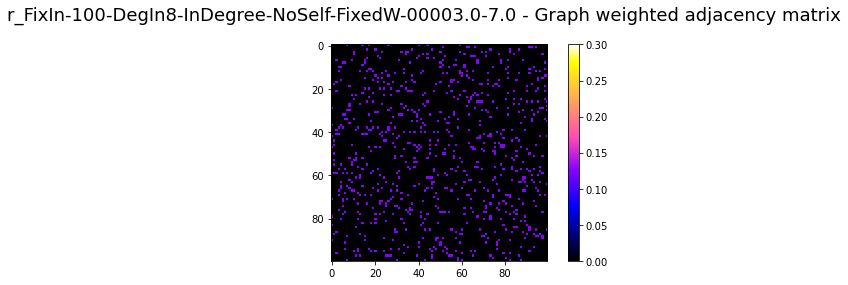

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 8.0 - type g <class 'networkx.classes.digraph.DiGraph'>


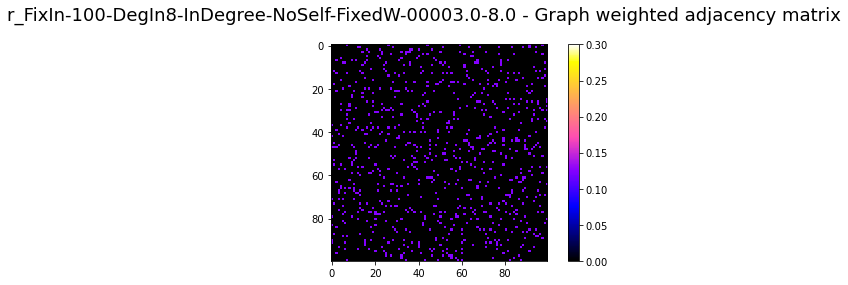

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 9.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 10.0 - type g <class 'networkx.classes.digraph.DiGraph'>


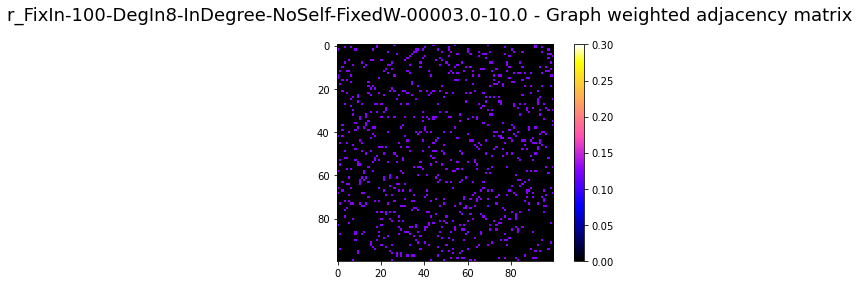

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 11.0 - type g <class 'networkx.classes.digraph.DiGraph'>


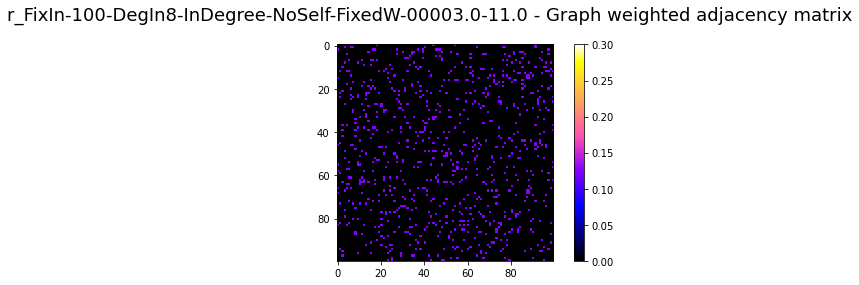

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 12.0 - type g <class 'networkx.classes.digraph.DiGraph'>


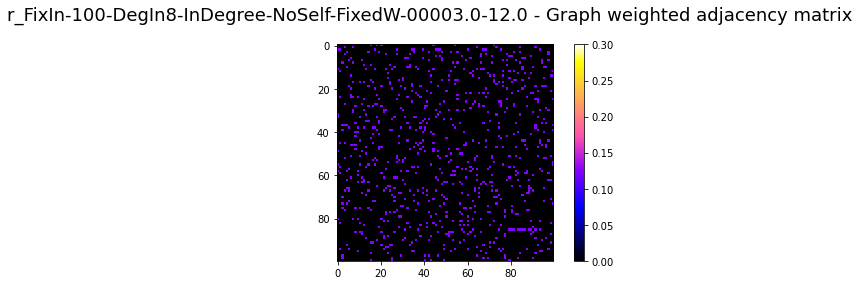

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 13.0 - type g <class 'networkx.classes.digraph.DiGraph'>


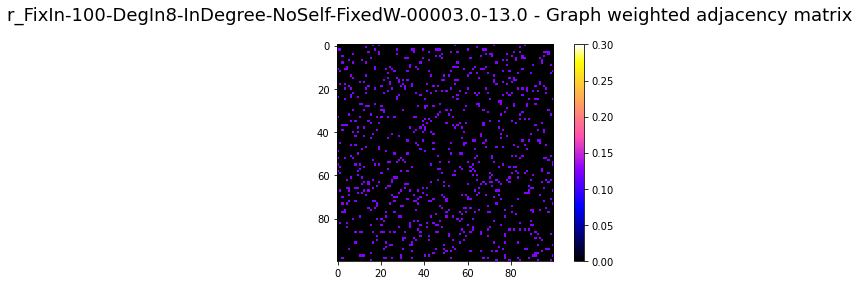

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 14.0 - type g <class 'networkx.classes.digraph.DiGraph'>


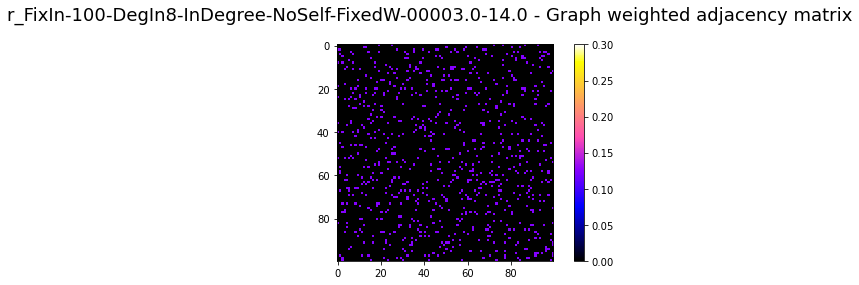

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 15.0 - type g <class 'networkx.classes.digraph.DiGraph'>


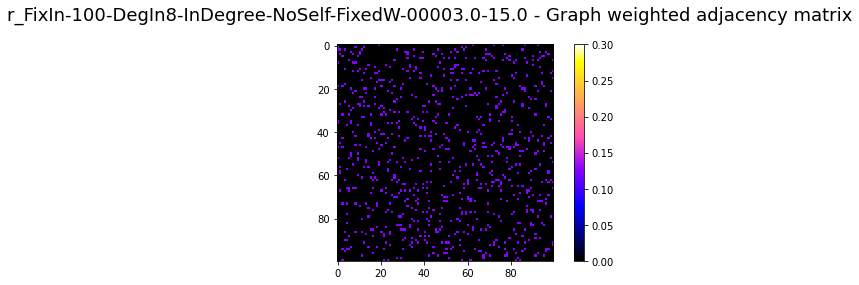

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 16.0 - type g <class 'networkx.classes.digraph.DiGraph'>


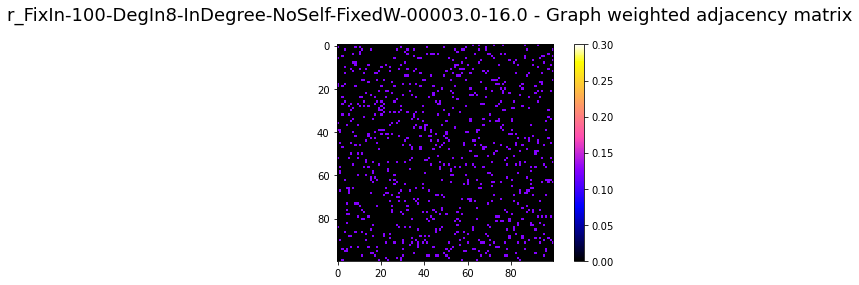

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 17.0 - type g <class 'networkx.classes.digraph.DiGraph'>


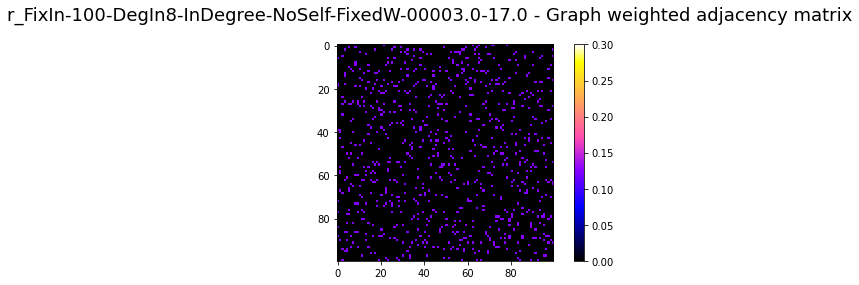

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 18.0 - type g <class 'networkx.classes.digraph.DiGraph'>


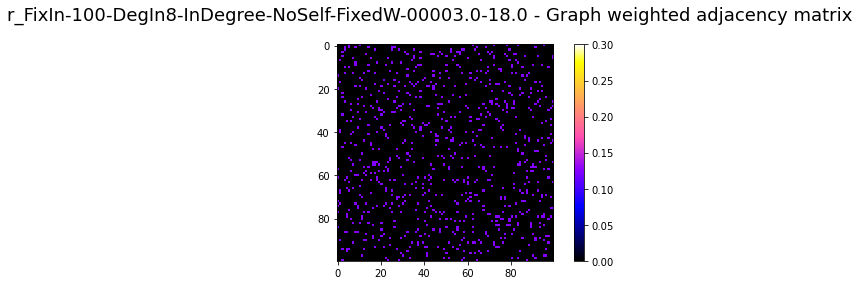

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 3.0 19.0 - type g <class 'networkx.classes.digraph.DiGraph'>


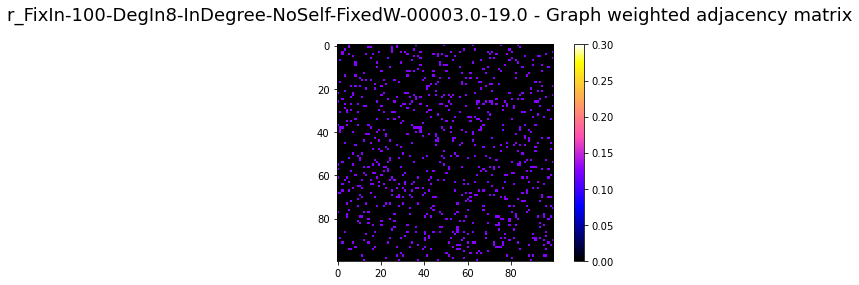

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


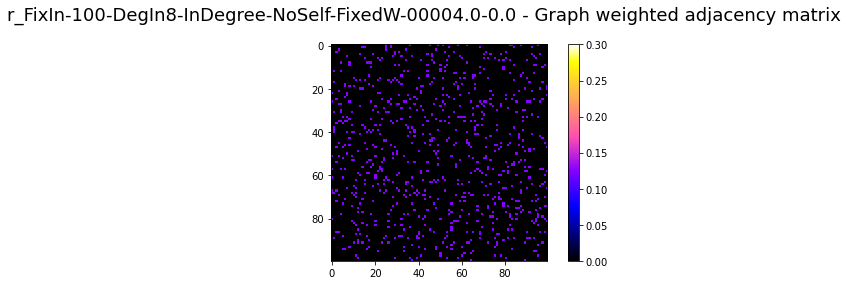

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


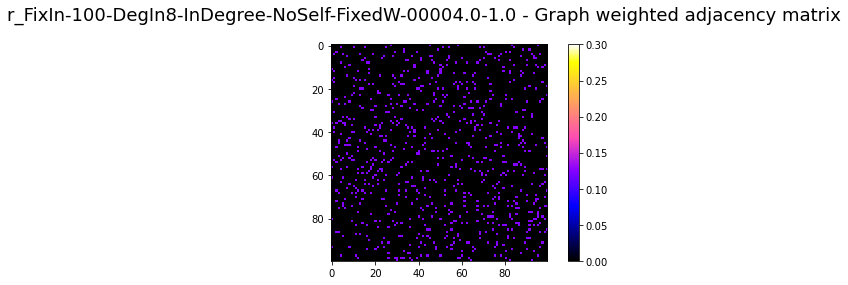

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


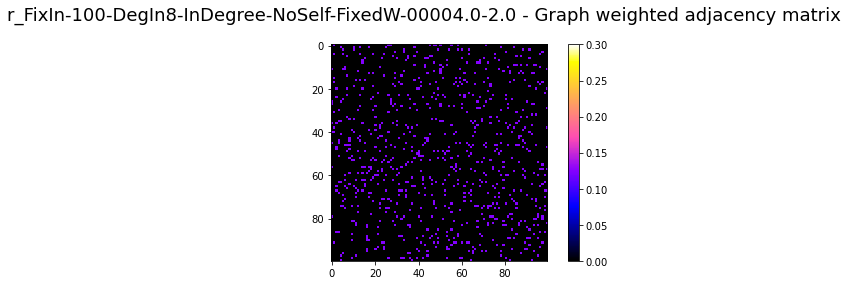

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


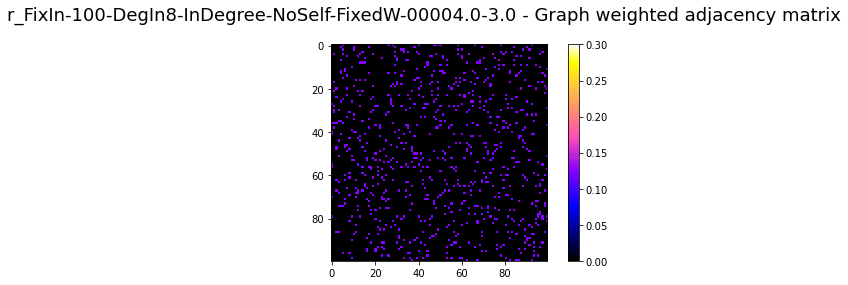

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


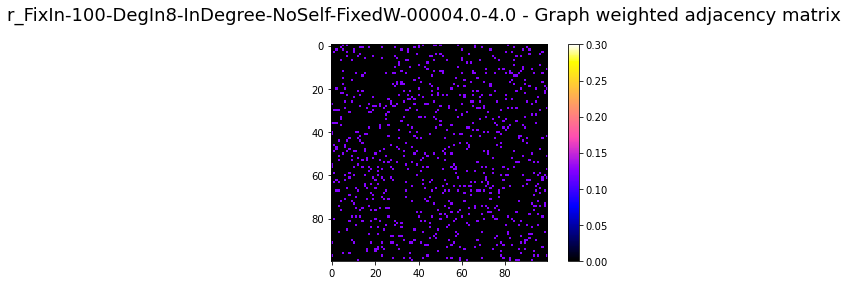

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 5.0 - type g <class 'networkx.classes.digraph.DiGraph'>


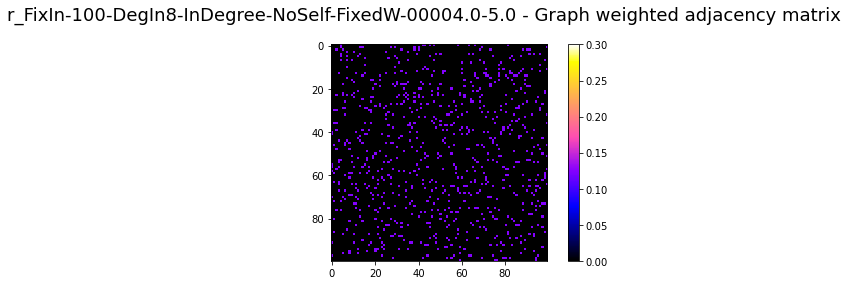

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 6.0 - type g <class 'networkx.classes.digraph.DiGraph'>


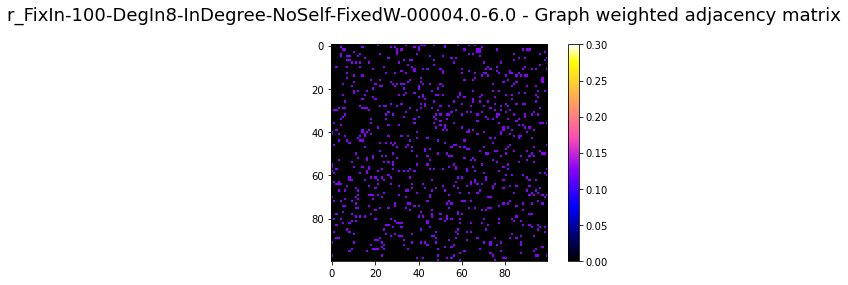

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 7.0 - type g <class 'networkx.classes.digraph.DiGraph'>


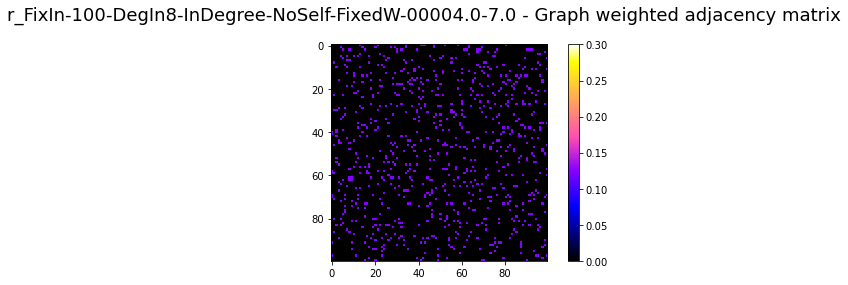

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 8.0 - type g <class 'networkx.classes.digraph.DiGraph'>


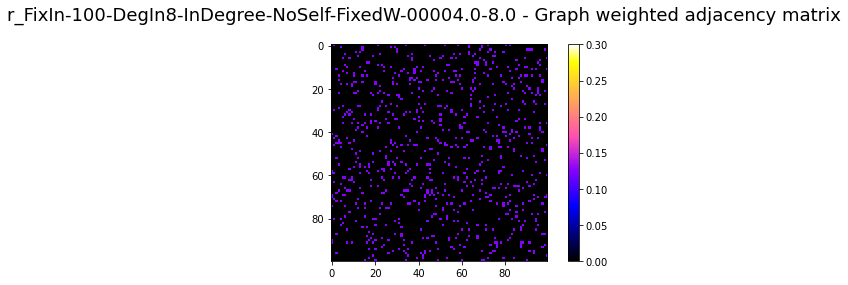

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 9.0 - type g <class 'networkx.classes.digraph.DiGraph'>


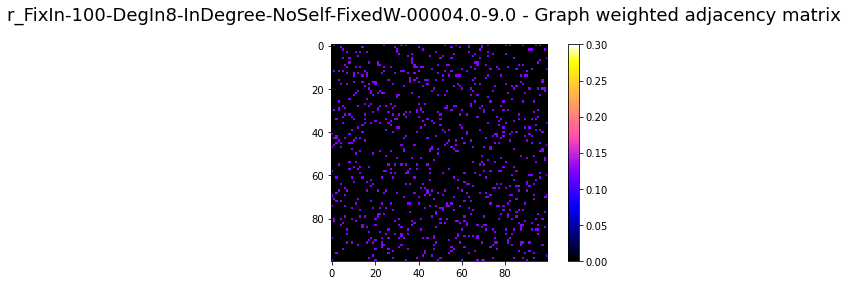

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 10.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 11.0 - type g <class 'networkx.classes.digraph.DiGraph'>


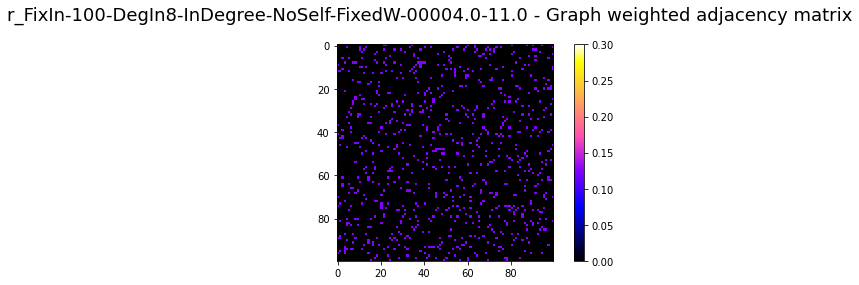

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 12.0 - type g <class 'networkx.classes.digraph.DiGraph'>


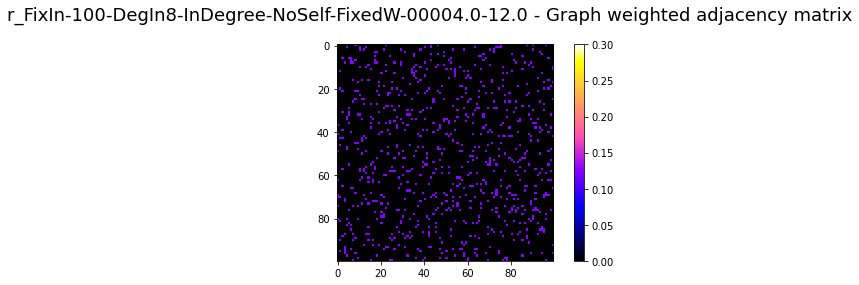

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 13.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 14.0 - type g <class 'networkx.classes.digraph.DiGraph'>


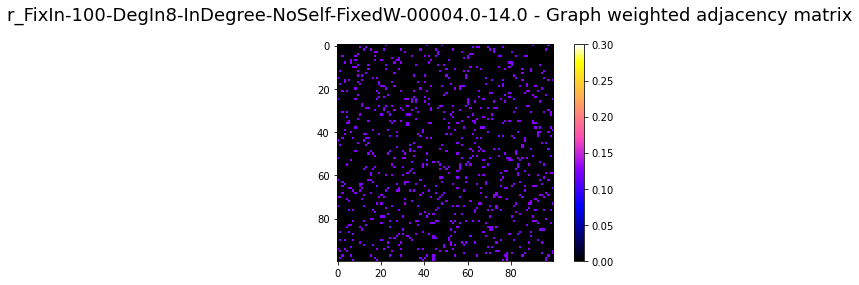

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 15.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 16.0 - type g <class 'networkx.classes.digraph.DiGraph'>


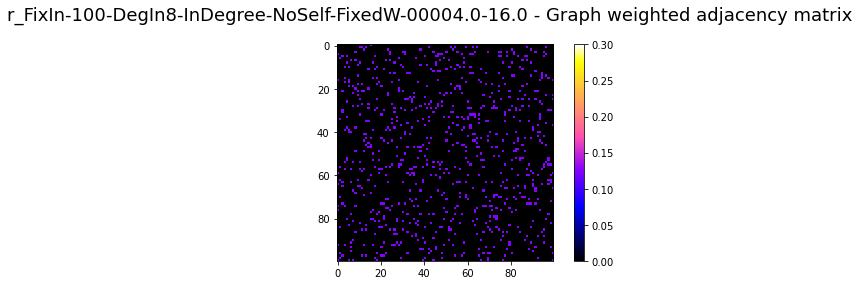

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 17.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 18.0 - type g <class 'networkx.classes.digraph.DiGraph'>


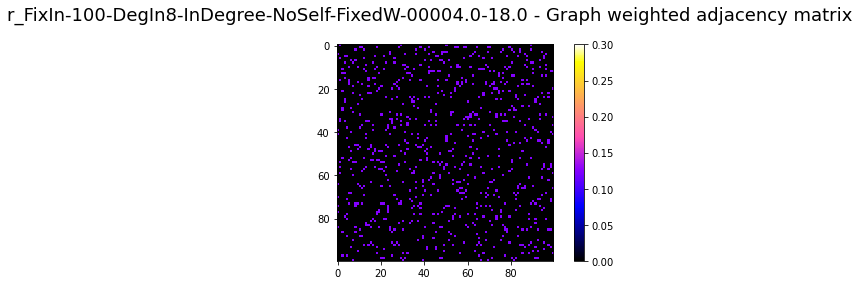

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 4.0 19.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


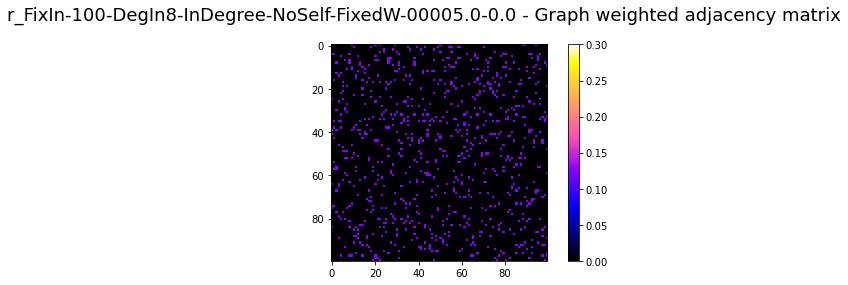

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


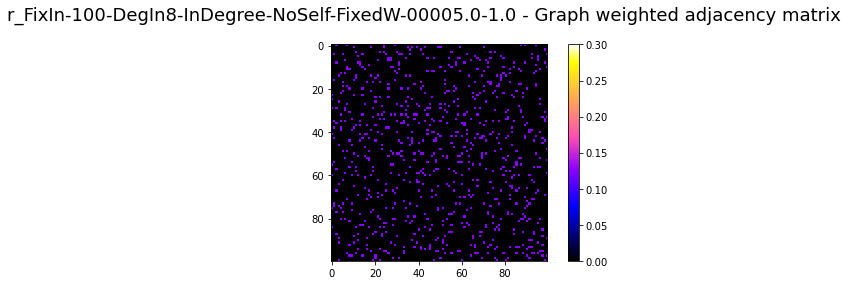

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


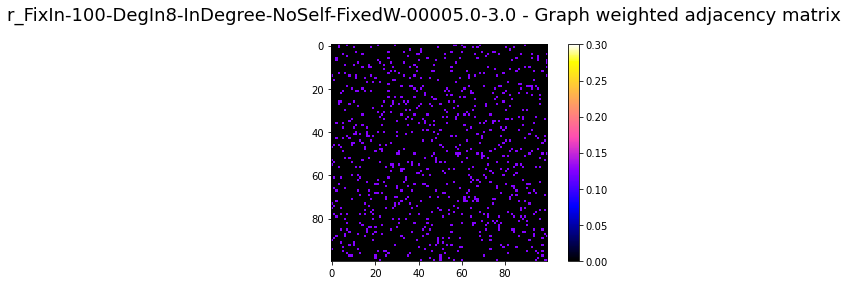

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


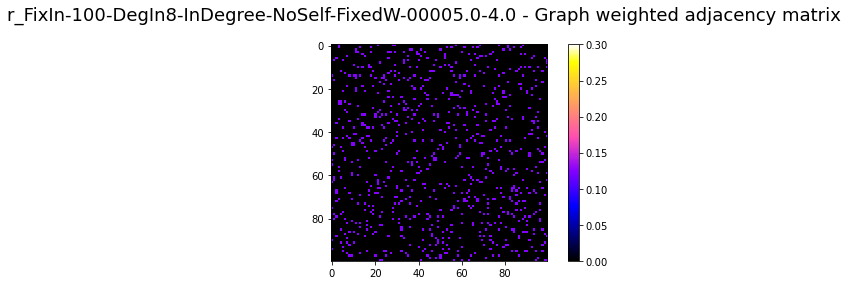

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 5.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 6.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 7.0 - type g <class 'networkx.classes.digraph.DiGraph'>


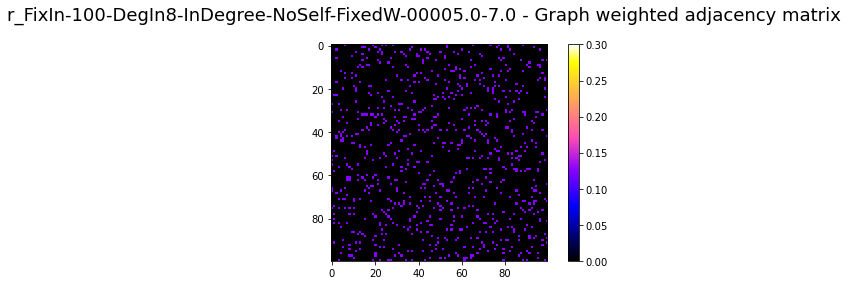

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 8.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 9.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 10.0 - type g <class 'networkx.classes.digraph.DiGraph'>


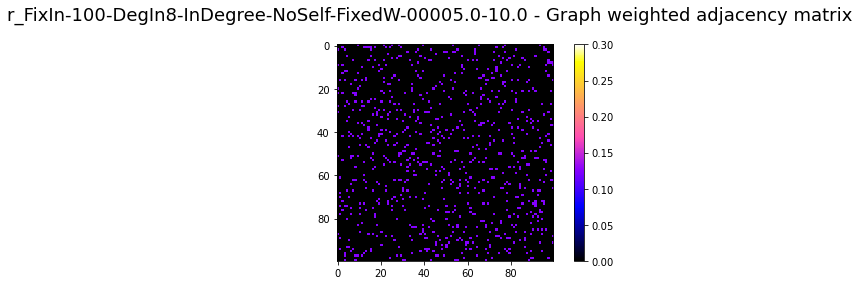

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 11.0 - type g <class 'networkx.classes.digraph.DiGraph'>


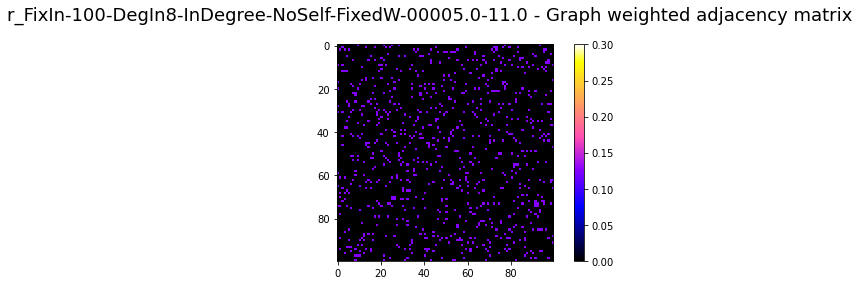

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 12.0 - type g <class 'networkx.classes.digraph.DiGraph'>


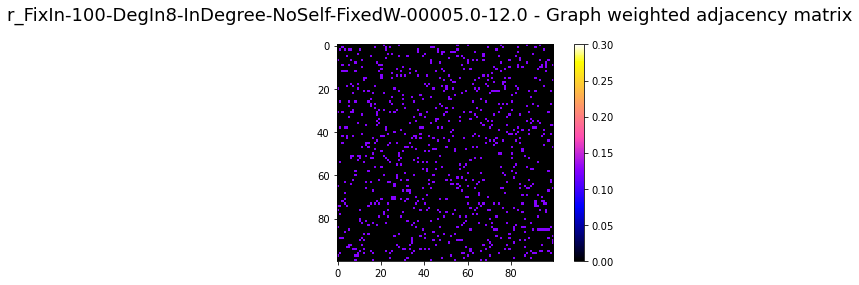

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 13.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 14.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 15.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 16.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 17.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 18.0 - type g <class 'networkx.classes.digraph.DiGraph'>


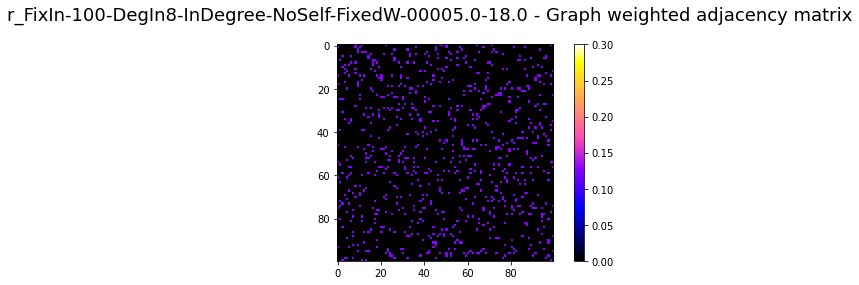

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 5.0 19.0 - type g <class 'networkx.classes.digraph.DiGraph'>


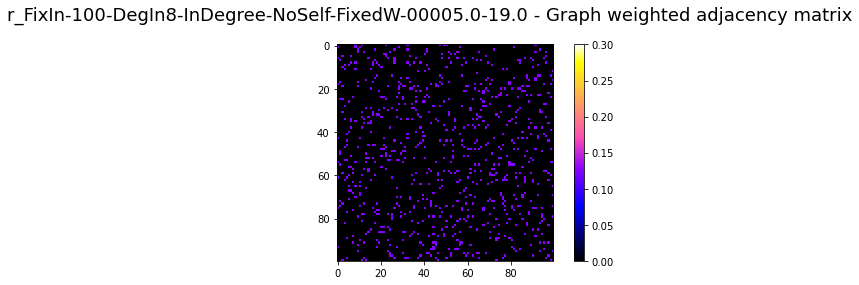

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100000.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100000.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


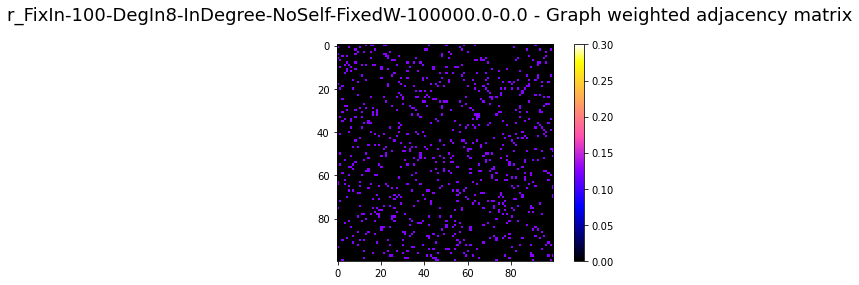

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100000.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


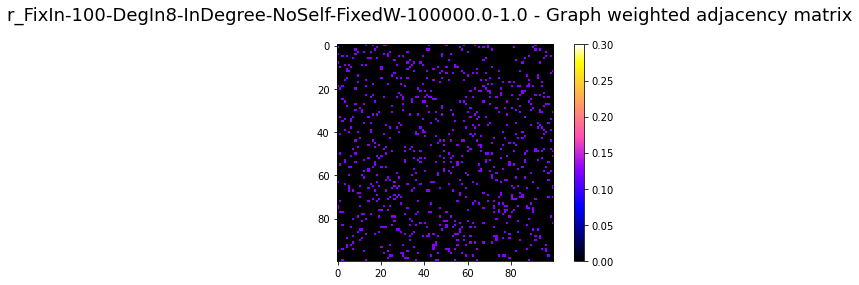

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100000.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100000.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


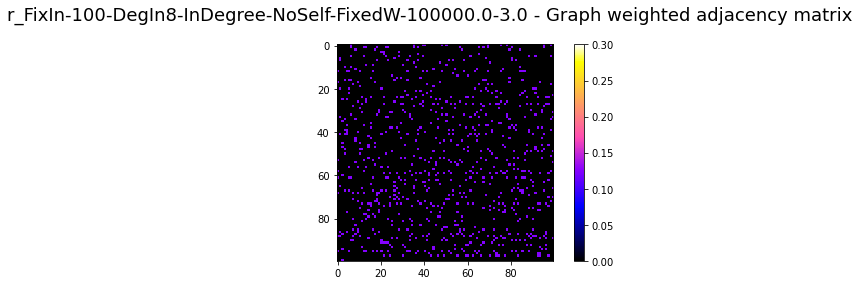

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100000.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100001.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100001.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100001.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


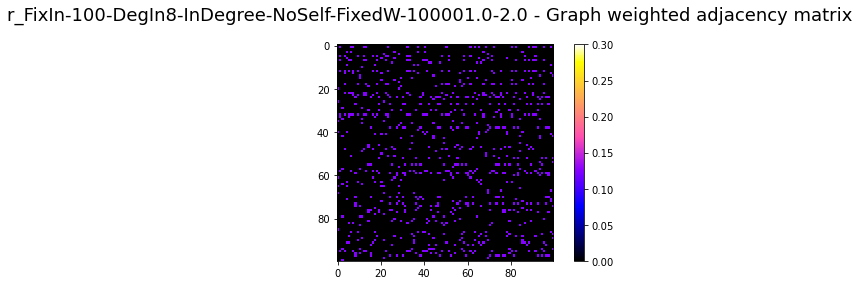

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100001.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


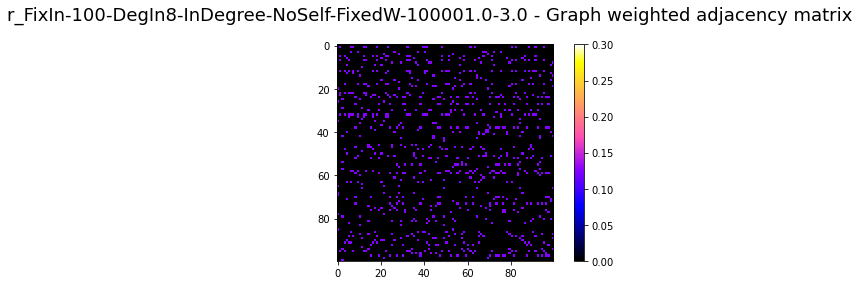

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100001.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


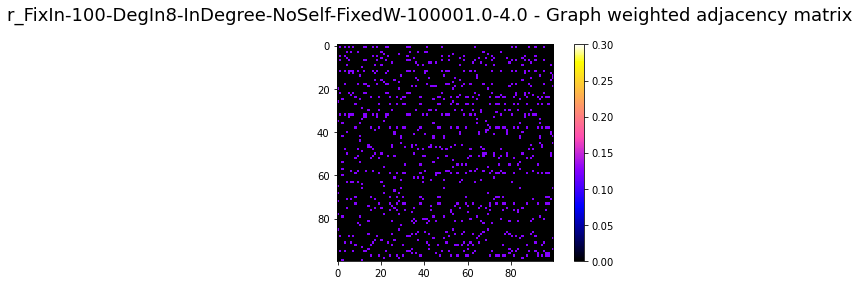

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100002.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


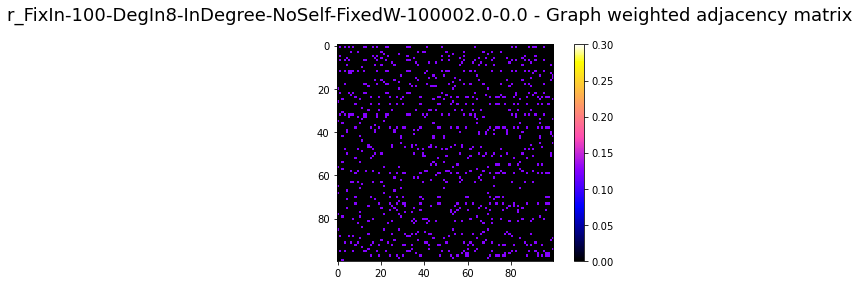

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100002.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


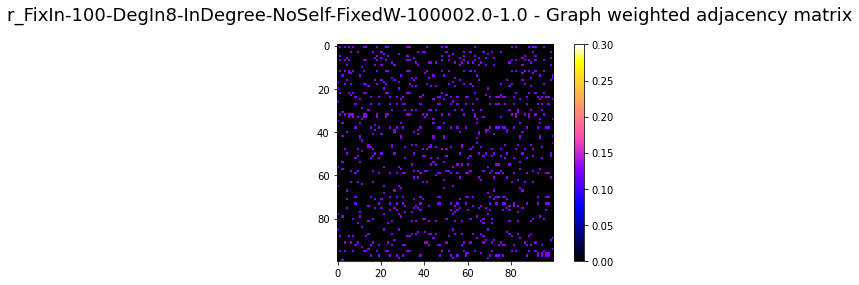

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100002.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100002.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


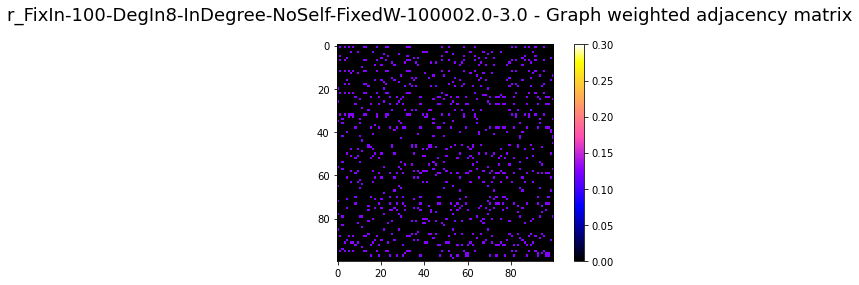

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100002.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100003.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


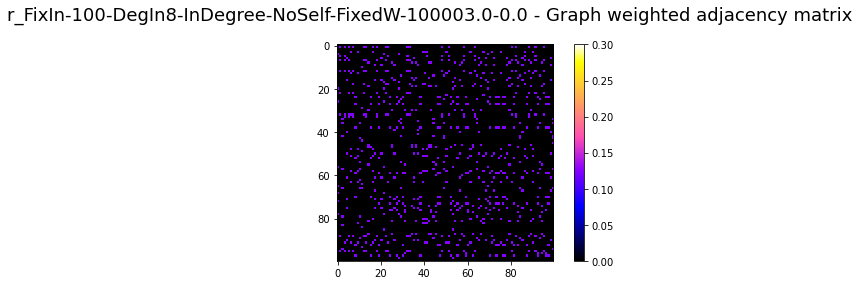

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100003.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100003.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


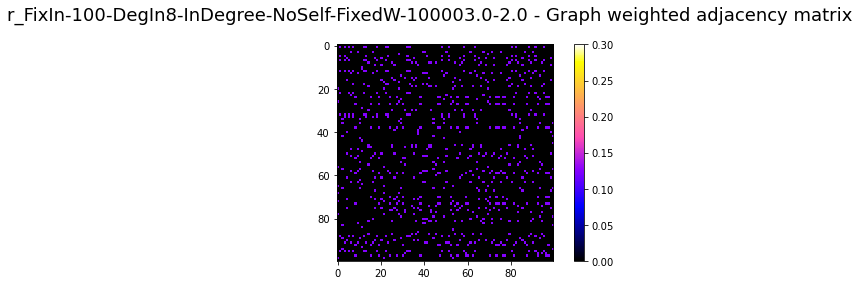

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100003.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100003.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


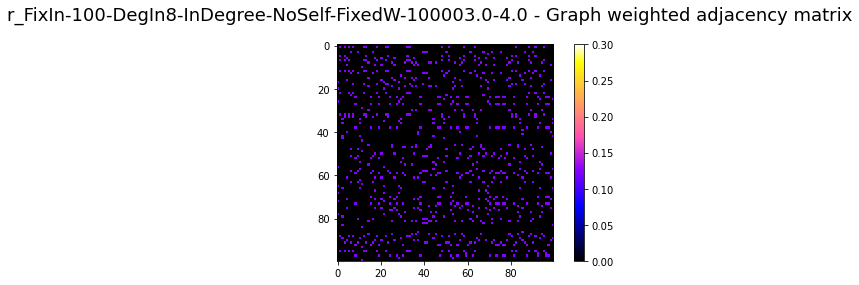

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100004.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


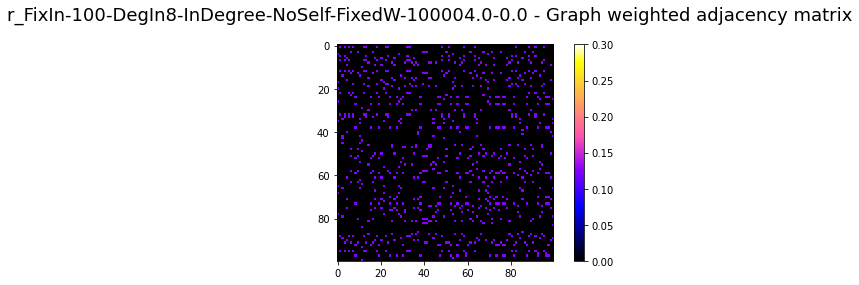

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100004.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


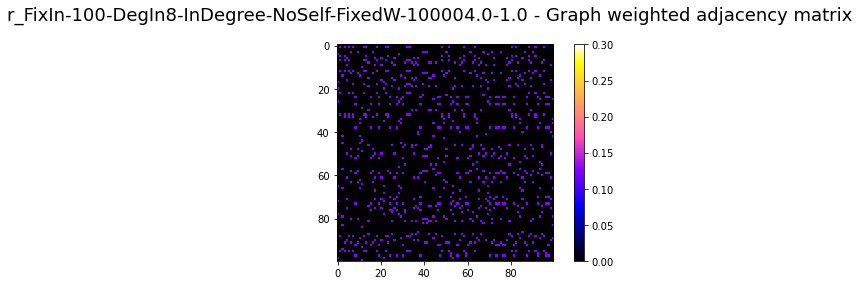

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100004.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


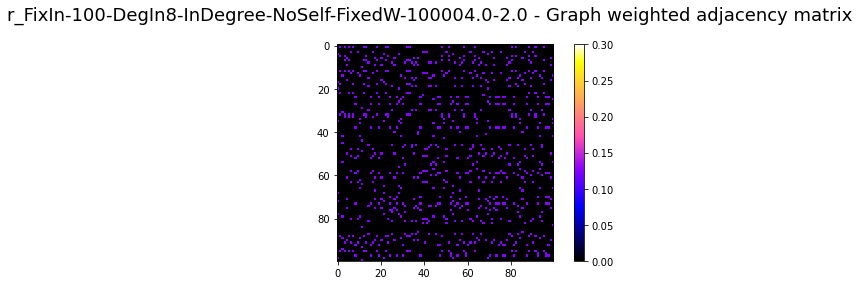

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100004.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


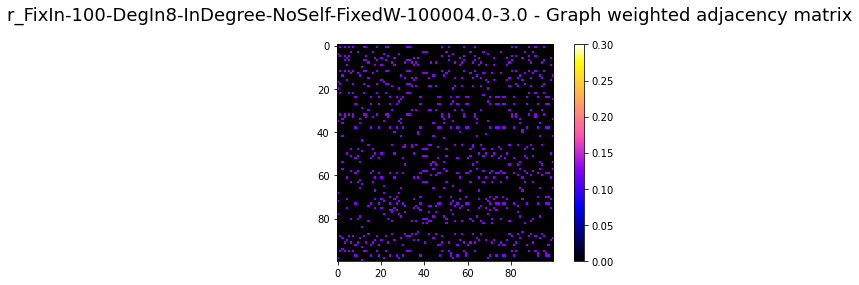

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100004.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


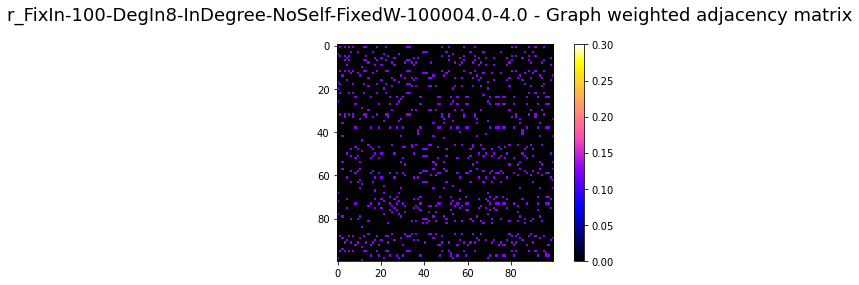

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100005.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


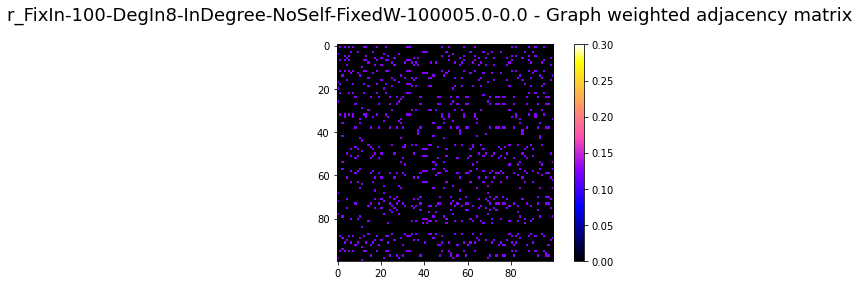

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100005.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


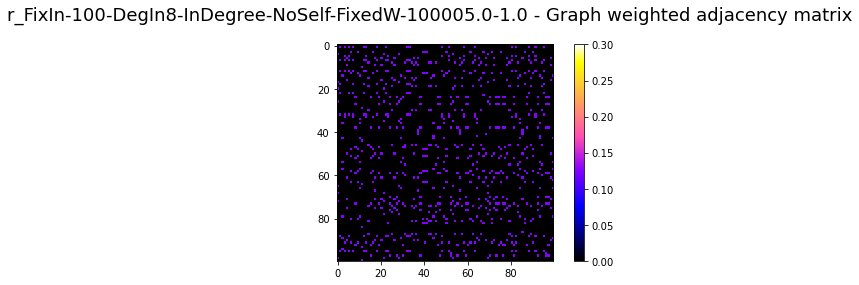

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100005.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


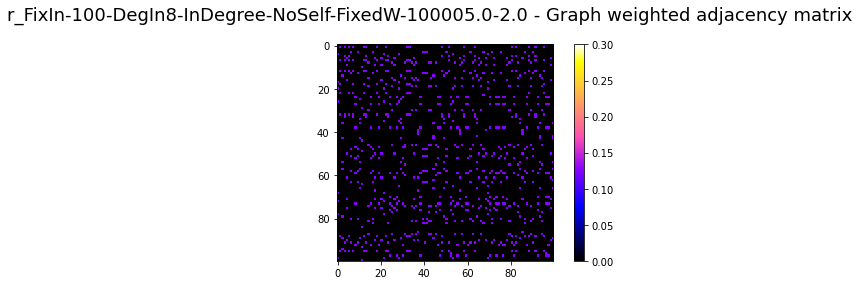

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100005.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


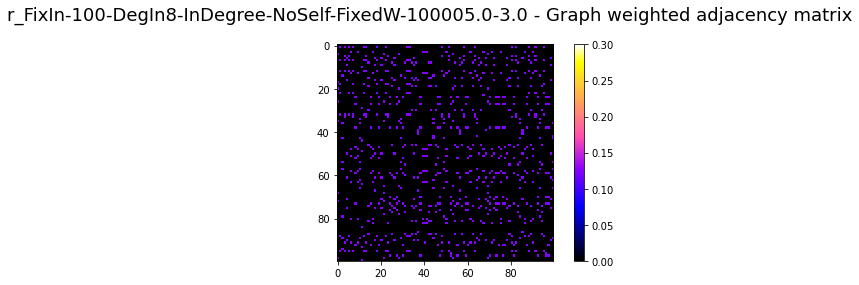

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100005.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


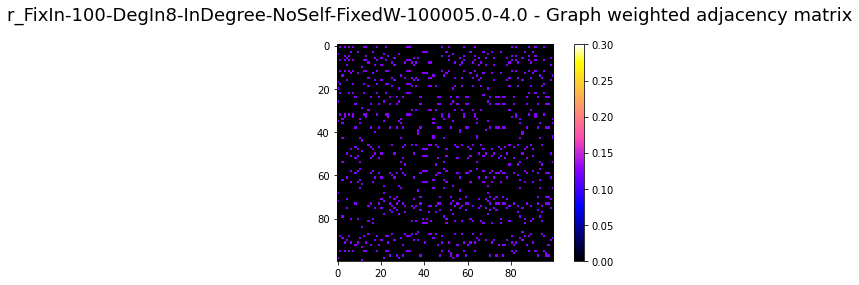

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100006.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


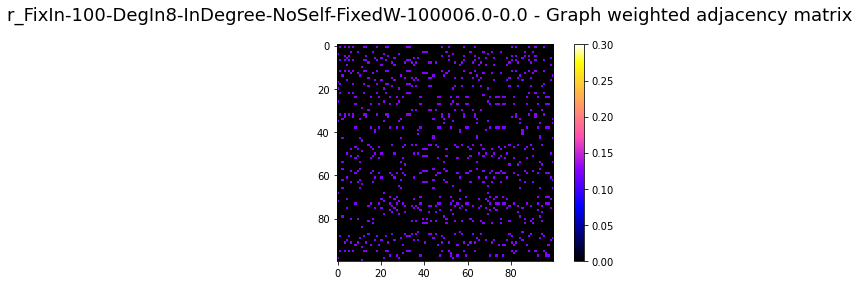

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100006.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


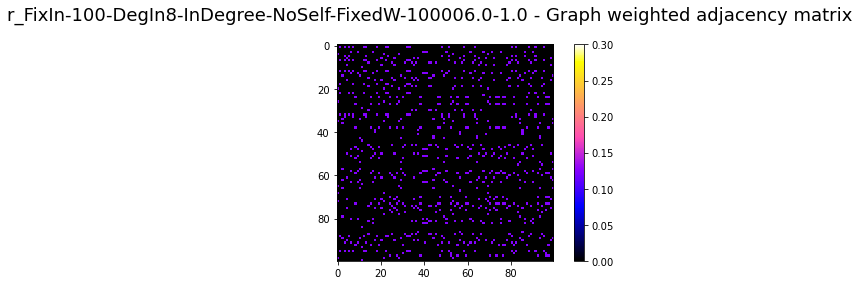

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100006.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


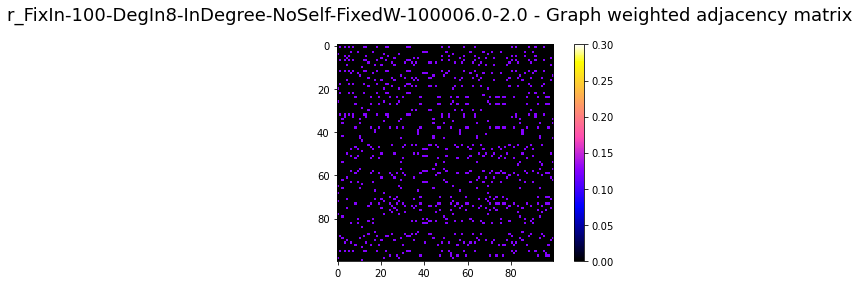

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100006.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


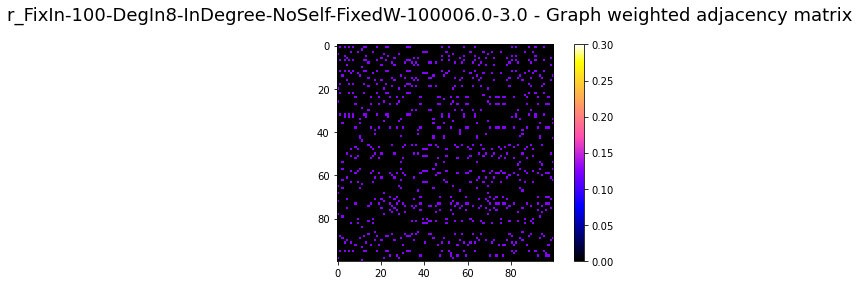

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100006.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


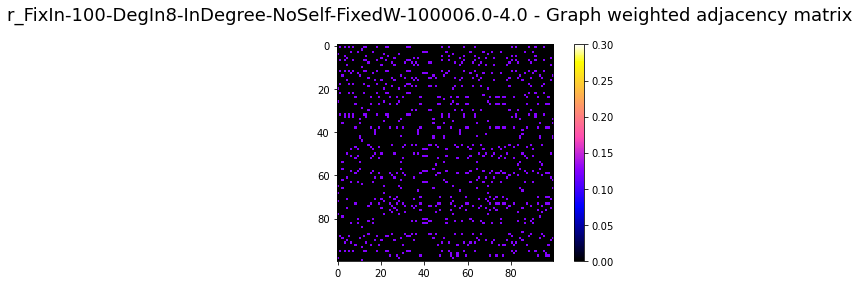

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100007.0 0.0 - type g <class 'networkx.classes.digraph.DiGraph'>


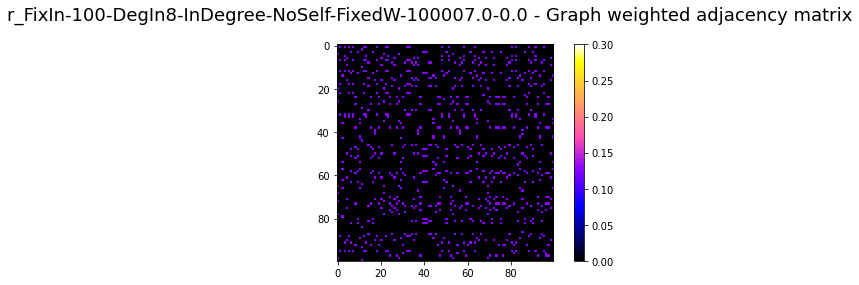

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100007.0 1.0 - type g <class 'networkx.classes.digraph.DiGraph'>


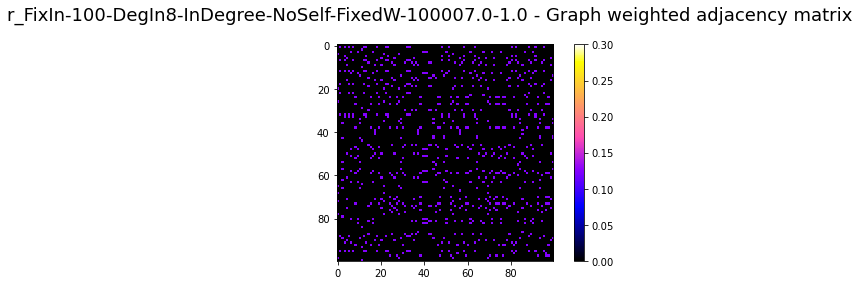

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100007.0 2.0 - type g <class 'networkx.classes.digraph.DiGraph'>


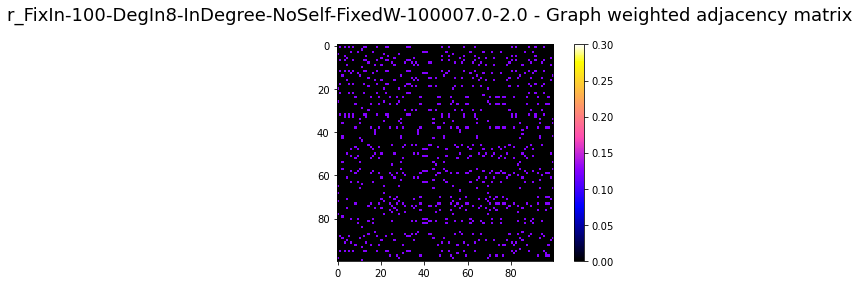

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100007.0 3.0 - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW 100007.0 4.0 - type g <class 'networkx.classes.digraph.DiGraph'>


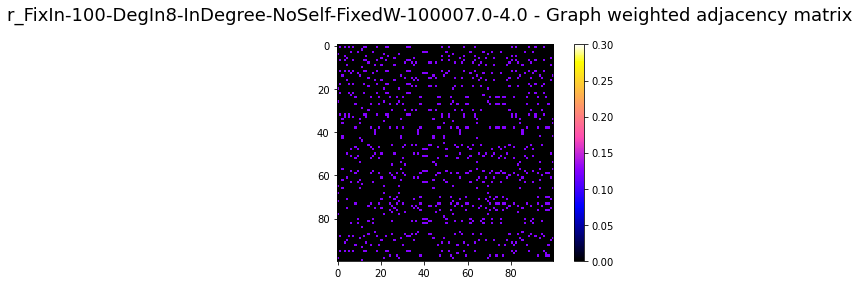

Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW nan nan - type g <class 'networkx.classes.digraph.DiGraph'>


Row r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW nan nan - type g <class 'networkx.classes.digraph.DiGraph'>


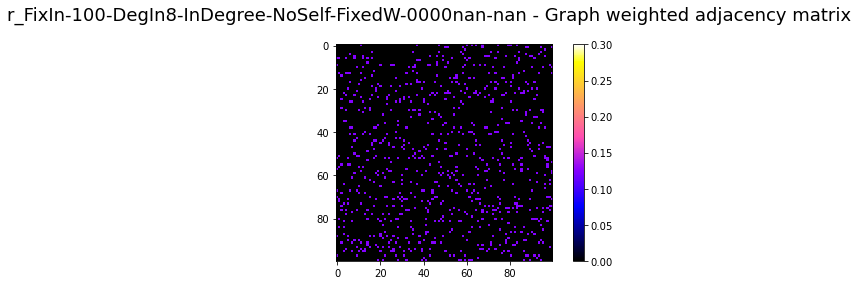

In [10]:
import sys
sys.path.append('./Metropolis/')
sys.path.append('./src')
from gvisu import drawMatrix

kwargs = { 'vmin': 0, 'vmax': 0.3 }

for i, row in df.sort_values(by=['beta', 'time'], ascending=True).iterrows():
    print(f'Row {row.experiment} {row.beta} {row.time} - type g {type(row.g)}')
    drawMatrix(row.g, experiment_title=f'r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW-{row.beta:#07}-{row.time:#03}', folder='./images', showImages=True, **kwargs)
